# Team 20 
# Customer Personality Aanalysis

## Introduction
We are going to use Customer Personality Analysis data set (https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis) which contains data of a company’s customers. 
We will analyze this data set, get insights that help marketting team to conduct better marketing strategies as customizing campains for certain customer groups or clusters. 

### Question
How many groups shuld we divide the customers into? and What marketing recommendations for each group?

### Assumptions are:
1. **'Graduation'** is the same as **'Bachelor'**
2. **'2n Cycle'** is the same as **'Master'**
3. **'Income'** more than 125K is an outlier
4. **'Age'**: more than 100 years to be ignored

In [1]:
# Python 3.12.3 was used to compile this file.

# Importing Required Libraries
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import csv

# Define the Location of the dataset tSV file (Tab seperated value)
file_path = r'C:\Users\Administrator\Downloads\DSIProject\cpa.tsv'   # Original file name (marketing_campaign.csv) was modified to reflect the right file type and for ease of use.

# Read the dataset and store it in alist called 'data'
# Open the TSV file and read its contents
with open(file_path, mode='r', newline='') as file:
    reader = csv.reader(file, delimiter='\t')
    data = list(reader)  # Store the data in a list

# Converting the list 'data' to Pandas DataFrame called 'df'
df = pd.DataFrame(data[1:], columns=data[0])

# Convert 'Income' column to numeric, handling errors
df['Income'] = pd.to_numeric(df['Income'], errors='coerce')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-13,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-14,94,173,...,5,0,0,0,0,0,0,3,11,0


In [2]:
# Get information on the dataframe and it's columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   object 
 1   Year_Birth           2240 non-null   object 
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   object 
 6   Teenhome             2240 non-null   object 
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   object 
 9   MntWines             2240 non-null   object 
 10  MntFruits            2240 non-null   object 
 11  MntMeatProducts      2240 non-null   object 
 12  MntFishProducts      2240 non-null   object 
 13  MntSweetProducts     2240 non-null   object 
 14  MntGoldProds         2240 non-null   object 
 15  NumDealsPurchases    2240 non-null   o

In [44]:
# Getting Description on each coloumn and that is:
    # Getting count of values 
    # Getting Mean, standard Deviation, Minimumm, 25% , 50%, 75%, and maximum value
df.describe().T   # T: means transpose 

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2172.0,-4.225799e-15,1.000230,-2.466387,-0.839371,0.102585,0.702012,2.329028
Income,2172.0,-1.095911e-16,1.000230,-2.078149,-0.812922,-0.027442,0.813707,3.047393
Kidhome,2172.0,7.033457e-17,1.000230,-0.820623,-0.820623,-0.820623,1.039913,2.900448
Teenhome,2172.0,1.243123e-16,1.000230,-0.935154,-0.935154,-0.935154,0.902995,2.741143
Recency,2172.0,4.007435e-17,1.000230,-1.699494,-0.868619,-0.003124,0.862371,1.727865
MntWines,2172.0,1.635688e-18,1.000230,-0.916375,-0.842468,-0.378328,0.592818,3.497387
MntFruits,2172.0,-1.144981e-17,1.000230,-0.666501,-0.616439,-0.466254,0.159521,4.314662
MntMeatProducts,2172.0,6.706320e-17,1.000230,-0.771201,-0.697111,-0.451690,0.327408,3.785305
MntFishProducts,2172.0,-7.360595e-18,1.000230,-0.693997,-0.639304,-0.475222,0.217567,4.027905
MntSweetProducts,2172.0,-3.762082e-17,1.000230,-0.663825,-0.639631,-0.446074,0.164840,5.675160


**Explanation of variables**:

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

**Products**

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

**Promotion**

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

**Place**

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

## Data Exploring, Cleansing & Manipulation

#### Cleansing **'Income'** values

In [4]:
# Cleansing 'Income' values

# find out how many 'Income' values is NA
print('Number of NA values in Income Before cleansing is : ', df['Income'].isna().sum())

# Filter out rows where 'Income' is NA by using .loc and boolean indexing for rows then Dropping those rows from the data frame 'df'. 
df = df.loc[df['Income'].notna()]

print("NA values from 'Income' Removed Completley")

Number of NA values in Income Before cleansing is :  24
NA values from 'Income' Removed Completley


In [5]:
# Reseting the index to correct index errors after dropping some rows
df.reset_index(drop=True, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216 entries, 0 to 2215
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   object 
 1   Year_Birth           2216 non-null   object 
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   object 
 6   Teenhome             2216 non-null   object 
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   object 
 9   MntWines             2216 non-null   object 
 10  MntFruits            2216 non-null   object 
 11  MntMeatProducts      2216 non-null   object 
 12  MntFishProducts      2216 non-null   object 
 13  MntSweetProducts     2216 non-null   object 
 14  MntGoldProds         2216 non-null   object 
 15  NumDealsPurchases    2216 non-null   o

#### Checking for **duplicate values** and dropping them if any

In [6]:
# Check if there are duplicated values using duplicate() and use sum() function to count how many.
duplicates = df.duplicated().sum()
print('Number of Duplicates in the dataset is: ', duplicates)

Number of Duplicates in the dataset is:  0


##### **Marital_Status** values Cleansing and Manipulation
1. Dropping 'Absurd' and 'YOLO' values
2. Replace 'Alone' by 'Single'
3. Replace 'Together' by 'Married'

No of Absurd =  0
No of YOLO =  0
The categories in the Marital Status are:  ['Single' 'Married' 'Divorced' 'Widow']


C:\Users\Administrator\AppData\Local\Temp\1\ipykernel_4676\358334751.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


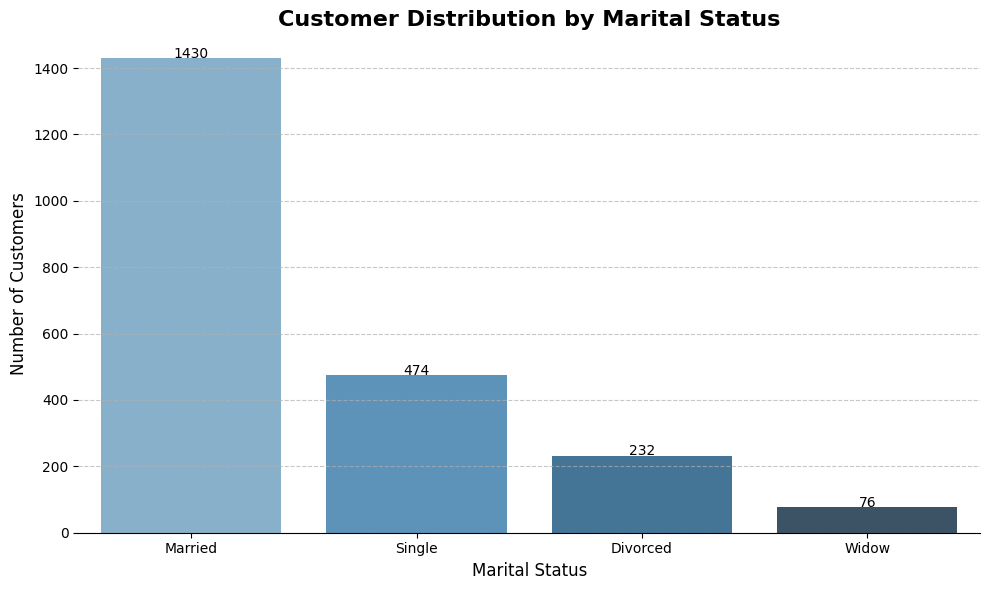

In [7]:
# Marital_Status Column cleansing:
    # 1. Dropping 'Absurd' and  'YOLO'
    # 2. Replace 'Alone' by 'Single'
    # 3. Replace 'Together' by 'Married' 

# Dropping the rows that has Marital_Status == 'Absurd'
df = df[df['Marital_Status'] != 'Absurd']

# Dropping the rows that has Marital_Status == 'YOLO'
df = df[df['Marital_Status'] != 'YOLO']

# Making Sure All Rows where Marital_Status = 'Absurd'
print('No of Absurd = ',df[df['Marital_Status'] == 'Absurd']['Marital_Status'].count())

# Making Sure All Rows where Marital_Status = 'YOLO' 
print('No of YOLO = ',df[df['Marital_Status'] == 'YOLO']['Marital_Status'].count())

# Revise the Marital_status
df['Marital_Status_revised'] = df['Marital_Status'].replace({
    'Alone': 'Single',    # Replace 'Alone' by 'Single'
    'Together': 'Married' # Replace 'Together' by 'Married'
    })

print('The categories in the Marital Status are: ', df['Marital_Status_revised'].unique())

# Saving the revised marital status in 'Marital_status'
df['Marital_Status']=df['Marital_Status_revised']

# Dropping Marital_Status_revised
df=df.drop(columns=['Marital_Status_revised'])

# Count the number of customers in each Marital Status category
marital_status_counts = df['Marital_Status'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=marital_status_counts.index, 
    y=marital_status_counts.values, 
    palette='Blues_d'  # Use a corporate-style blue palette
)

# Add labels and title
plt.title('Customer Distribution by Marital Status', fontsize=16, fontweight='bold')
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add value annotations above bars
for i, value in enumerate(marital_status_counts.values):
    plt.text(
        i, 
        value + 1,  # Position above the bar
        str(value), 
        ha='center', 
        fontsize=10, 
        color='black'
    )

# Customize grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True)  # Remove the left spine for a cleaner look
plt.tight_layout()

# Show the chart
plt.show()

In [8]:
# Reseting the index to correct index errors after dropping column 'Marital_Status_revised'
df.reset_index(drop=True, inplace=True)

#### **Education** values Cleansing and Manipulation
1. Replace 'Graduation' by 'Bachelor'
2. Replace '2n Cycle' by 'Master'

The categories in the Education are:  ['Bachelor' 'PhD' 'Master' 'Basic']


C:\Users\Administrator\AppData\Local\Temp\1\ipykernel_4676\340649277.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


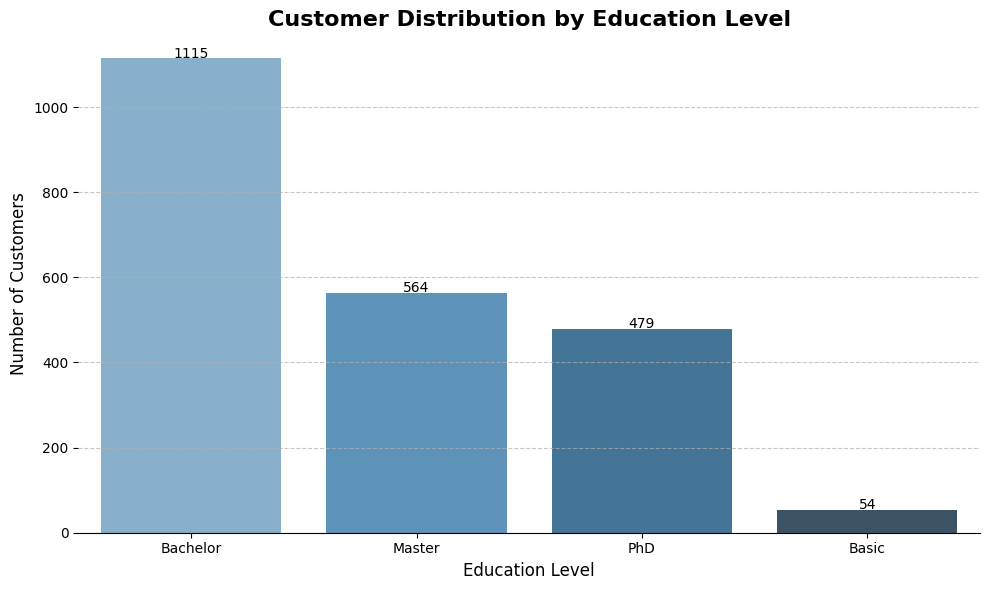

In [9]:
# Education Column cleansing:
# 1. Replace 'Graduation' by 'Bachelor'
# 2. Replace '2n Cycle' by 'Master'

# Replace 'Graduation' by 'Bachelor', and '2n Cycle' by 'Master'
df['Education_revised'] = df['Education'].replace({
    'Graduation': 'Bachelor',
    '2n Cycle': 'Master'
})
print('The categories in the Education are: ', df['Education_revised'].unique())

# Saving the revised Education in 'Education'
df['Education'] = df['Education_revised']

# Dropping the revised Education column
df = df.drop(columns=['Education_revised'])

# Count the number of customers in each Education category
education_counts = df['Education'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=education_counts.index, 
    y=education_counts.values, 
    palette='Blues_d'  # Use a blue color palette for accessibility
)

# Add labels and title
plt.title('Customer Distribution by Education Level', fontsize=16, fontweight='bold')
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add value annotations above bars
for i, value in enumerate(education_counts.values):
    plt.text(
        i, 
        value + 1,  # Position above the bar
        str(value), 
        ha='center', 
        fontsize=10, 
        color='black'
    )

# Customize grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True)  # Remove left spine for a cleaner look
plt.tight_layout()

# Show the chart
plt.show()


#### **Adding** a New Column called **'Age' ( Age of customer)** AND **Dropping** any row with customer over 100 years old

Number of persons with Age more than 100 years Before Removing them from our Data is:  3
Number of persons with Age more than 100 years After Removing them from our Data is:  0


C:\Users\Administrator\AppData\Local\Temp\1\ipykernel_4676\3100109765.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


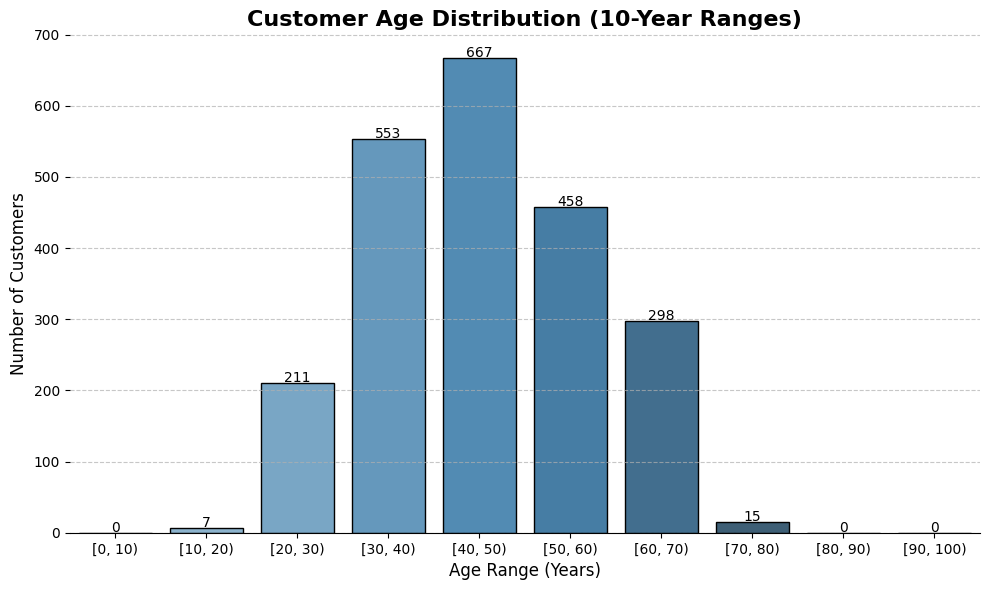

In [10]:
# Adding a new column called 'Age'

df['Age'] = 2014 - df['Year_Birth'].astype(int)   # 2014 was the latest year in the dataset

# Finding how many persons with age more than 100 years old
print('Number of persons with Age more than 100 years Before Removing them from our Data is: ', (df[df['Age'] >= 100]['Age'].count()))    # we found 3 persons with Age > 100 years old

# Remove people with age > 100 years
df = df[df['Age'] <= 100]


# Reseting the index to correct index errors after dropping and removing some data
df.reset_index(drop=True, inplace=True)

print('Number of persons with Age more than 100 years After Removing them from our Data is: ', (df[df['Age'] >= 100]['Age'].count()))

# Group ages into 10-year bins and count frequencies
age_bins = pd.cut(df['Age'], bins=range(0, 101, 10), right=False)
age_counts = age_bins.value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Larger figure for clarity
sns.barplot(
    x=age_counts.index.astype(str),  # Convert bin ranges to string for display
    y=age_counts.values,
    palette='Blues_d',  
    edgecolor='black'
)

# Add labels and title
plt.title('Customer Age Distribution (10-Year Ranges)', fontsize=16, fontweight='bold')
plt.xlabel('Age Range (Years)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add value annotations on each bar
for i, value in enumerate(age_counts.values):
    plt.text(
        i, 
        value + 1,  # Position above the bar
        str(value), 
        ha='center', 
        fontsize=10, 
        color='black'
    )

# Customize the grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True)  # Cleaner look by removing left spine
plt.tight_layout()

# Show the plot
plt.show()


#### Visualizing the **'Income'** values

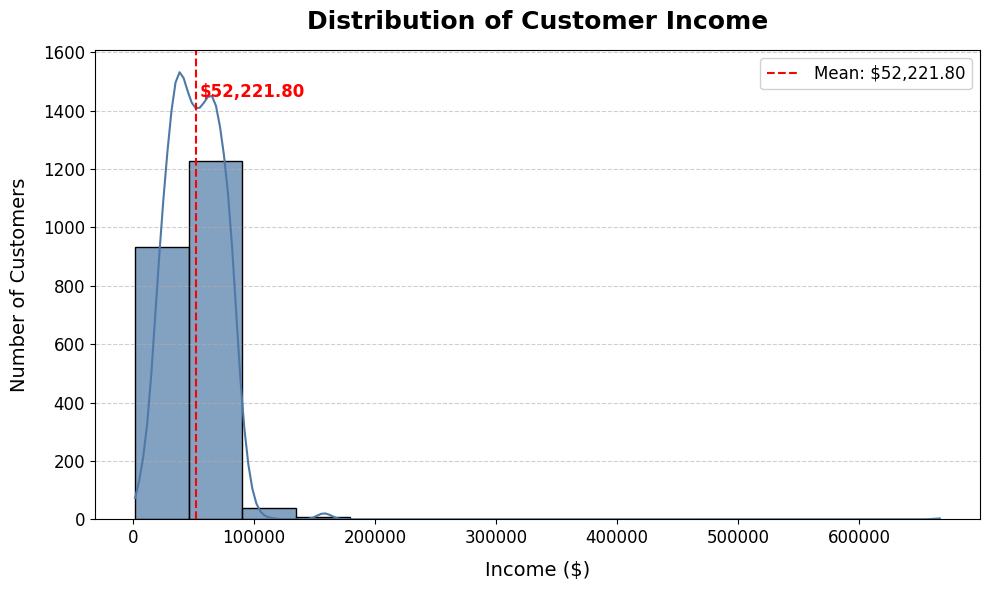

In [11]:
# Updated Income Distribution Visualization
plt.figure(figsize=(10, 6))  
# Plot histogram using seaborn
sns.histplot(
    data=df, 
    x='Income', 
    bins=15,  
    kde=True,  
    color='#4E79A7', 
    edgecolor='black', 
    alpha=0.7
)

# Calculate and add mean income line
mean_income = df['Income'].mean()
plt.axvline(mean_income, color='red', linestyle='--', linewidth=1.5, label=f'Mean: ${mean_income:,.2f}')

# Customize the title and labels
plt.title('Distribution of Customer Income', fontsize=18, fontweight='bold', pad=15)
plt.xlabel('Income ($)', fontsize=14, labelpad=10)
plt.ylabel('Number of Customers', fontsize=14, labelpad=10)

# Annotate mean income
plt.text(
    mean_income + mean_income * 0.05,  
    plt.gca().get_ylim()[1] * 0.9,   
    f'${mean_income:,.2f}', 
    color='red', 
    fontsize=12, 
    fontweight='bold'
)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Set tick parameters for a polished appearance
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=12, loc='upper right', frameon=True, framealpha=0.9)

# Add tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()



#### We have ***outlier*** in the Income  ***coloumn*** So, We are going to remove outliers (assumption **'Income'** more than 125K is an outlier)

Number of persons within the range $10,000-$125,000: 2172


C:\Users\Administrator\AppData\Local\Temp\1\ipykernel_4676\1821504819.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


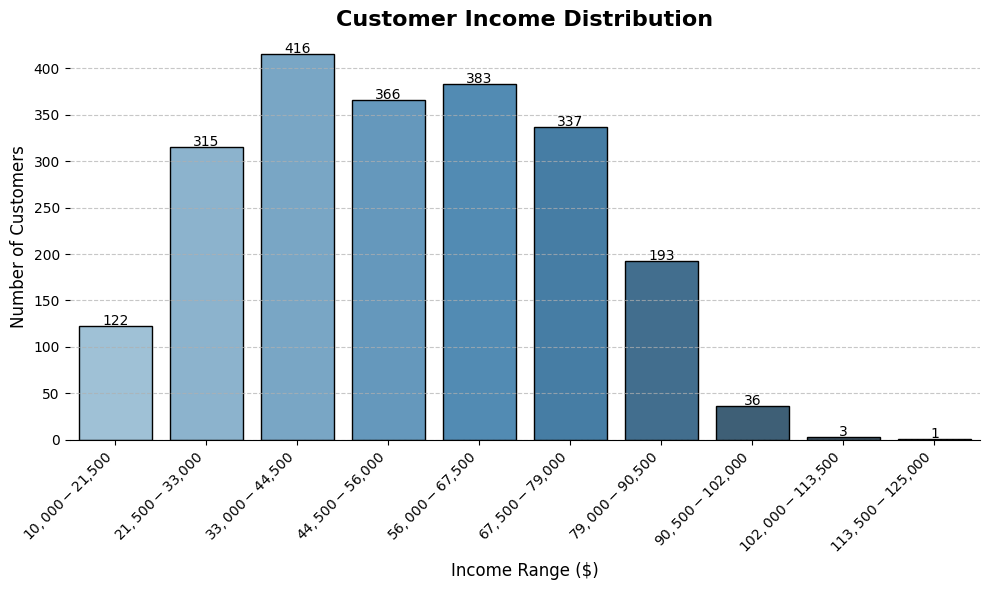

In [12]:
# Example data (replace with your actual DataFrame)
# df = pd.read_csv('your_file.csv')

# Define income range for filtering
income_lower_bound = 10000  # Minimum income threshold
income_upper_bound = 125000  # Maximum income threshold

# Filter the DataFrame based on the defined range
df = df[(df['Income'] >= income_lower_bound) & (df['Income'] <= income_upper_bound)]

# Reset the index after filtering
df.reset_index(drop=True, inplace=True)

# Display the number of rows after filtering
print(f'Number of persons within the range ${income_lower_bound:,}-${income_upper_bound:,}: {len(df)}')

# Define income bins and create labels for the bins
bin_edges = pd.interval_range(start=income_lower_bound, end=income_upper_bound, periods=10)
income_bins = pd.cut(df['Income'], bins=bin_edges, precision=0)
income_counts = income_bins.value_counts().sort_index()

# Format bin labels for clarity
bin_labels = [f"${int(interval.left):,} - ${int(interval.right):,}" for interval in income_counts.index]

# Create a bar chart for income distribution
plt.figure(figsize=(10, 6))
sns.barplot(
    x=bin_labels,  # Use formatted labels for x-axis
    y=income_counts.values,
    palette='Blues_d',  # Professional blue color palette
    edgecolor='black'
)

# Add labels and title
plt.title('Customer Income Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Income Range ($)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add value annotations on each bar
for i, value in enumerate(income_counts.values):
    plt.text(
        i,
        value + 1,
        str(value),
        ha='center',
        fontsize=10,
        color='black'
    )

# Customize the grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
sns.despine(left=True)
plt.tight_layout()

# Show the plot
plt.show()


**Observations**: Looking at a glance, there is a wide peak for the income distribution for the customer base in the dataset. We can see that majority of the customer base has a 40k to 70k income, which may suggest a large middle-class customer base, where the customers are relatively equally distributed. This similarity in frequency across this range implies less variability within this income segment, making a more stable, predictable segment of the population. However, we will see when we cluster and segment our data with 

#### Dropping 2 columns: **'Z_CostContact'** & **'Z_Revenue'**   because they do not add value to the data, 'Z_CostContact'=3 always, 'Z_Revenue'=11 always.

In [13]:
# Dropping 2 columns: 'Z_CostContact'   &    'Z_Revenue'
    # Reason for Droping 'Z_CostContact' is that column has always a value of 3  
    # Reason for Droping 'Z_Revenue' is that column has always a value of 11  

df = df.drop(columns=['Z_CostContact', 'Z_Revenue'])
print(" Z_CostContact Coloumn Removed")
print(" Z_Revenue Coloumn Removed")
df.head(5)

 Z_CostContact Coloumn Removed
 Z_Revenue Coloumn Removed


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age
0,5524,1957,Bachelor,Single,58138.0,0,0,04-09-12,58,635,...,4,7,0,0,0,0,0,0,1,57
1,2174,1954,Bachelor,Single,46344.0,1,1,08-03-14,38,11,...,2,5,0,0,0,0,0,0,0,60
2,4141,1965,Bachelor,Married,71613.0,0,0,21-08-13,26,426,...,10,4,0,0,0,0,0,0,0,49
3,6182,1984,Bachelor,Married,26646.0,1,0,10-02-14,26,11,...,4,6,0,0,0,0,0,0,0,30
4,5324,1981,PhD,Married,58293.0,1,0,19-01-14,94,173,...,6,5,0,0,0,0,0,0,0,33


#### Changing the format of 'Dt_Customer' to ease calculations

In [14]:
# Change the date format
# Convert 'Dt_Customer' to datetime to help in calculations related to date  
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)


C:\Users\Administrator\AppData\Local\Temp\1\ipykernel_4676\206559480.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)


#### Add a column called **'Since_Years'** to the data frame  to show how many years has been a customer and Dropping 'Dt_Customer'

In [15]:
# Add a colum called 'Since_Years' to the data frame  to show how many years has been a customer
df['Since_Years'] = 2014 - df['Dt_Customer'].dt.year

# Dropping Dt_Customer coloumn since it is not needed after creating Since_Year coloumn
df=df.drop(columns=['Dt_Customer'])
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Since_Years
0,5524,1957,Bachelor,Single,58138.0,0,0,58,635,88,...,7,0,0,0,0,0,0,1,57,2
1,2174,1954,Bachelor,Single,46344.0,1,1,38,11,1,...,5,0,0,0,0,0,0,0,60,0
2,4141,1965,Bachelor,Married,71613.0,0,0,26,426,49,...,4,0,0,0,0,0,0,0,49,1
3,6182,1984,Bachelor,Married,26646.0,1,0,26,11,4,...,6,0,0,0,0,0,0,0,30,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,5,0,0,0,0,0,0,0,33,0


#### Add a column called **'Total Number Purchases'** to the data frame  to show how many number of purchases customer done

In [16]:
# Creating a new column in the df called 'Total Number Purchases' = 'NumWebPurchases' + 'NumStorePurchases' + 'NumStorePurchases'
df['Total Number Purchases'] = df['NumWebPurchases'].astype(int) + df['NumStorePurchases'].astype(int) + df['NumCatalogPurchases'].astype(int)
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Since_Years,Total Number Purchases
0,5524,1957,Bachelor,Single,58138.0,0,0,58,635,88,...,0,0,0,0,0,0,1,57,2,22
1,2174,1954,Bachelor,Single,46344.0,1,1,38,11,1,...,0,0,0,0,0,0,0,60,0,4
2,4141,1965,Bachelor,Married,71613.0,0,0,26,426,49,...,0,0,0,0,0,0,0,49,1,20
3,6182,1984,Bachelor,Married,26646.0,1,0,26,11,4,...,0,0,0,0,0,0,0,30,0,6
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,0,0,0,0,0,0,0,33,0,14


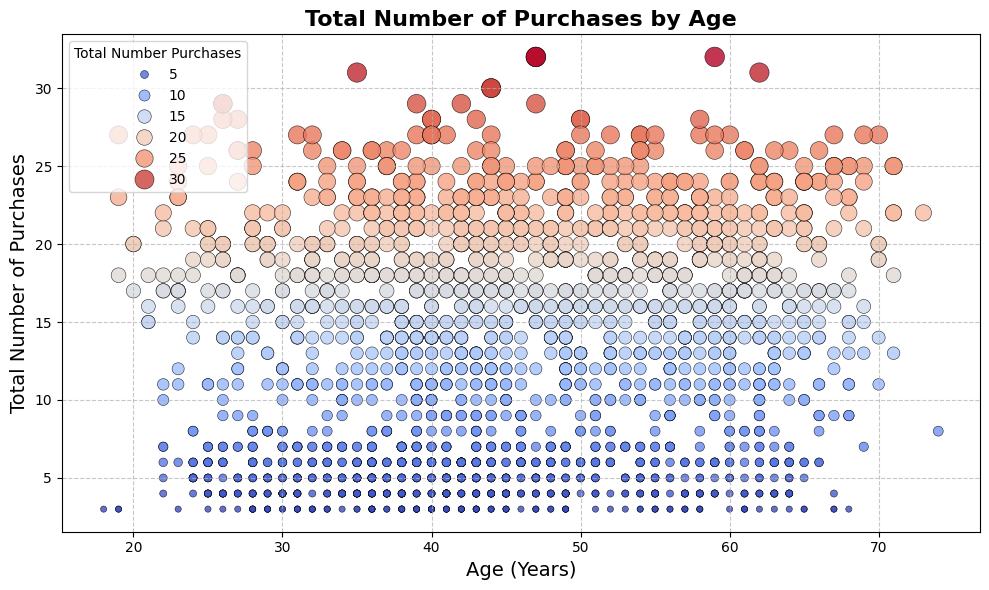

In [17]:
# Scatter plot for Total Number of Purchases by Age
plt.figure(figsize=(10, 6))

sns.scatterplot(
    x=df['Age'], 
    y=df['Total Number Purchases'], 
    hue=df['Total Number Purchases'],  
    size=df['Total Number Purchases'],  
    sizes=(20, 200), 
    palette='coolwarm', 
    alpha=0.8,
    edgecolor='black'
)

# Add titles and labels
plt.title('Total Number of Purchases by Age', fontsize=16, fontweight='bold')
plt.xlabel('Age (Years)', fontsize=14)
plt.ylabel('Total Number of Purchases', fontsize=14)

# Add a grid for readability
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\Administrator\AppData\Local\Temp\1\ipykernel_4676\472966294.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_purchases = df.groupby('Age Group')['Total Number Purchases'].sum()
C:\Users\Administrator\AppData\Local\Temp\1\ipykernel_4676\472966294.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


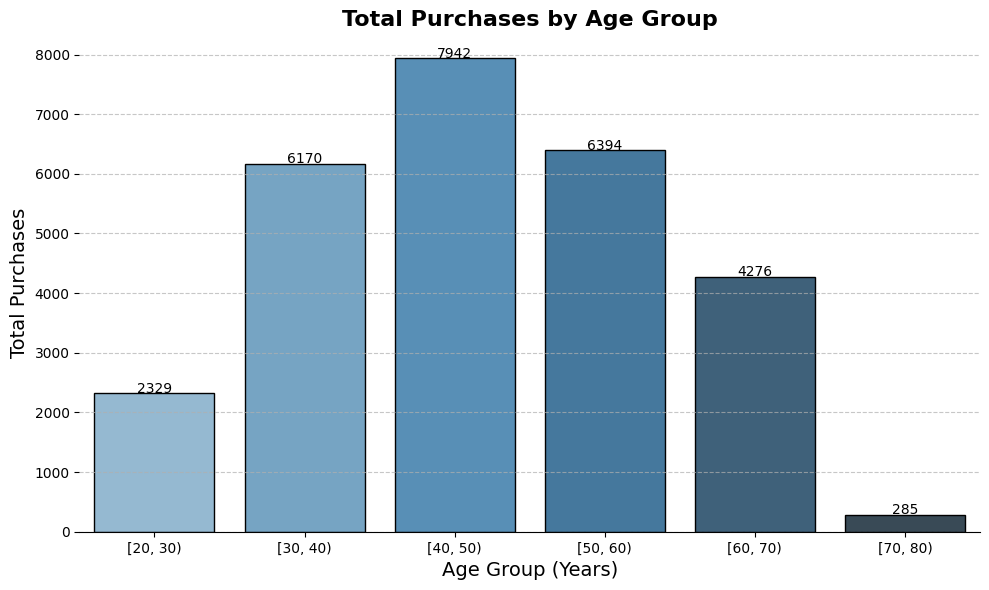

In [18]:
# Aggregate data by age groups for better visualization
df['Age Group'] = pd.cut(df['Age'], bins=range(20, 81, 10), right=False)
age_group_purchases = df.groupby('Age Group')['Total Number Purchases'].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))

sns.barplot(
    x=age_group_purchases.index.astype(str), 
    y=age_group_purchases.values,
    palette='Blues_d',  
    edgecolor='black'
)

# Add titles and labels
plt.title('Total Purchases by Age Group', fontsize=16, fontweight='bold')
plt.xlabel('Age Group (Years)', fontsize=14)
plt.ylabel('Total Purchases', fontsize=14)

# Annotate values on each bar
for i, value in enumerate(age_group_purchases.values):
    plt.text(
        i, 
        value + 5,  
        f'{value}', 
        ha='center', 
        fontsize=10, 
        color='black'
    )

# Customize grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True)  
plt.tight_layout()

# Show the plot
plt.show()


#### Add a column called **'Total Amount Purchases'** to the data frame  to show how much in Dollars value the customer done purchases.

In [19]:
# Creating a new column in the df called 'Total Amount Purchases' = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts']+ df['MntFishProducts']+ df['MntSweetProducts']+ df['MntGoldProds']
df['Total Amount Purchases'] = df['MntWines'].astype(int) + df['MntFruits'].astype(int) + df['MntMeatProducts'].astype(int)+ df['MntFishProducts'].astype(int)+ df['MntSweetProducts'].astype(int)+ df['MntGoldProds'].astype(int)
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Since_Years,Total Number Purchases,Age Group,Total Amount Purchases
0,5524,1957,Bachelor,Single,58138.0,0,0,58,635,88,...,0,0,0,0,1,57,2,22,"[50, 60)",1617
1,2174,1954,Bachelor,Single,46344.0,1,1,38,11,1,...,0,0,0,0,0,60,0,4,"[60, 70)",27
2,4141,1965,Bachelor,Married,71613.0,0,0,26,426,49,...,0,0,0,0,0,49,1,20,"[40, 50)",776
3,6182,1984,Bachelor,Married,26646.0,1,0,26,11,4,...,0,0,0,0,0,30,0,6,"[30, 40)",53
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,0,0,0,0,0,33,0,14,"[30, 40)",422


#### Add a column called **'No of Accepted Campains'** to the data frame  to show how many campains or promotions the customer accepted.

In [20]:
#Creating a feature to get a sum of accepted promotions 
df["No of Accepted Campains"] = df["AcceptedCmp1"].astype(int)+ df["AcceptedCmp2"].astype(int)+ df["AcceptedCmp3"].astype(int)+ df["AcceptedCmp4"].astype(int)+ df["AcceptedCmp5"].astype(int)
df.tail(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Since_Years,Total Number Purchases,Age Group,Total Amount Purchases,No of Accepted Campains
2167,10870,1967,Bachelor,Married,61223.0,0,1,46,709,43,...,0,0,0,0,47,1,16,"[40, 50)",1341,0
2168,4001,1946,PhD,Married,64014.0,2,1,56,406,0,...,1,0,0,0,68,0,15,"[60, 70)",444,1
2169,7270,1981,Bachelor,Divorced,56981.0,0,0,91,908,48,...,0,0,0,0,33,0,18,"[30, 40)",1241,1
2170,8235,1956,Master,Married,69245.0,0,1,8,428,30,...,0,0,0,0,58,0,21,"[50, 60)",843,0
2171,9405,1954,PhD,Married,52869.0,1,1,40,84,3,...,0,0,0,1,60,2,8,"[60, 70)",172,0


#### Adding a column called **'Family_Size'** to the data frame to show how many members in the family

In [21]:
# Adding a column called 'Family_Size' to the data frame to show how many members in the family
df['Family_Size'] = 1 + df['Kidhome'].astype(int) + df['Teenhome'].astype(int) + df['Marital_Status'].apply(lambda x: 1 if x == 'Married' else 0)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp2,Complain,Response,Age,Since_Years,Total Number Purchases,Age Group,Total Amount Purchases,No of Accepted Campains,Family_Size
0,5524,1957,Bachelor,Single,58138.0,0,0,58,635,88,...,0,0,1,57,2,22,"[50, 60)",1617,0,1
1,2174,1954,Bachelor,Single,46344.0,1,1,38,11,1,...,0,0,0,60,0,4,"[60, 70)",27,0,3
2,4141,1965,Bachelor,Married,71613.0,0,0,26,426,49,...,0,0,0,49,1,20,"[40, 50)",776,0,2
3,6182,1984,Bachelor,Married,26646.0,1,0,26,11,4,...,0,0,0,30,0,6,"[30, 40)",53,0,3
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,0,0,0,33,0,14,"[30, 40)",422,0,3


#### Making sure that the type of **'Recency'** coloumn is float to avoid problems when doing dimentional reduction (PCA)

In [22]:
# Making sure that the type of recency coloumn is float
df['Recency'] = df['Recency'].astype(float)

#### We apply one-hot encoding to the **Education** and **Marital_Status** columns to convert categorical data ('Education', 'Marital_Status') into numerical format.

In [23]:
# Applying One-Hot Encoding on the categorical variables ('Education', 'Marital_Status') To Convert them into Numerical values
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=False)
df.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,No of Accepted Campains,Family_Size,Education_Bachelor,Education_Basic,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow
0,5524,1957,58138.0,0,0,58.0,635,88,546,172,...,0,1,True,False,False,False,False,False,True,False
1,2174,1954,46344.0,1,1,38.0,11,1,6,2,...,0,3,True,False,False,False,False,False,True,False
2,4141,1965,71613.0,0,0,26.0,426,49,127,111,...,0,2,True,False,False,False,False,True,False,False
3,6182,1984,26646.0,1,0,26.0,11,4,20,10,...,0,3,True,False,False,False,False,True,False,False
4,5324,1981,58293.0,1,0,94.0,173,43,118,46,...,0,3,False,False,False,True,False,True,False,False


#### Keep a copy of the modified data set before scaling (df_org)

In [24]:
df_org =df.copy()  # Keep a copy of the modified data set before scaling
df_org.head(10)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,No of Accepted Campains,Family_Size,Education_Bachelor,Education_Basic,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow
0,5524,1957,58138.0,0,0,58.0,635,88,546,172,...,0,1,True,False,False,False,False,False,True,False
1,2174,1954,46344.0,1,1,38.0,11,1,6,2,...,0,3,True,False,False,False,False,False,True,False
2,4141,1965,71613.0,0,0,26.0,426,49,127,111,...,0,2,True,False,False,False,False,True,False,False
3,6182,1984,26646.0,1,0,26.0,11,4,20,10,...,0,3,True,False,False,False,False,True,False,False
4,5324,1981,58293.0,1,0,94.0,173,43,118,46,...,0,3,False,False,False,True,False,True,False,False
5,7446,1967,62513.0,0,1,16.0,520,42,98,0,...,0,3,False,False,True,False,False,True,False,False
6,965,1971,55635.0,0,1,34.0,235,65,164,50,...,0,2,True,False,False,False,True,False,False,False
7,6177,1985,33454.0,1,0,32.0,76,10,56,3,...,0,3,False,False,False,True,False,True,False,False
8,4855,1974,30351.0,1,0,19.0,14,0,24,3,...,0,3,False,False,False,True,False,True,False,False
9,2125,1959,63033.0,0,0,82.0,194,61,480,225,...,0,1,True,False,False,False,True,False,False,False


#### We would apply **PCA** only to the **numerical columns** and leave the binary categorical variables out of the dimensional reduction; Since PCA dosen't deal good with categorical values. The binary data can then be handled separately through clustering or as features for later analysis.

In [25]:
# Dividing the columns into two types: 
# 1. Numerical values (in those we are going to standarize the values )
# 2. Categorical or Boolean

# ID of customers Excluded from scaling
# Exluding Totals from PCA 
# Excluding: 'Age',
# Excluding: 'Since_Years','Total Number Purchases', 'Total Amount Purchases',
# Excluding: 'No of Accepted Campains', 'Family_Size'

numerical_all = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
                 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']
print('Numerical Coloumns identified')

non_numerical_all = ['Education_Bachelor',
       'Education_Basic', 'Education_Master', 'Education_PhD',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Widow']
print('Non-Numerical Coloumns identified')

Numerical Coloumns identified
Non-Numerical Coloumns identified


#### We would Standarizing the numerical values (numerical_all coloumns) only using **standardscaler()**.

In [26]:
# Standarizing the numerical values (numerical_all coloumns)
scaler = StandardScaler()
df[numerical_all] = scaler.fit_transform(df[numerical_all])
df_scaled = df[numerical_all]
print('All Numerical Values has been standarized')
df_scaled.head()

All Numerical Values has been standarized


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,-1.010636,0.293867,-0.820623,-0.935154,0.308454,0.960878,1.536224,1.757104,2.441783,1.465299,...,2.670594,-0.582059,0.757736,-0.282948,-0.285785,-0.281998,-0.263484,-0.118345,-0.096404,2.371065
1,-1.267533,-0.290259,1.039913,0.902995,-0.383942,-0.883856,-0.641470,-0.743417,-0.657535,-0.639631,...,-0.603253,-1.201933,-0.121432,-0.282948,-0.285785,-0.281998,-0.263484,-0.118345,-0.096404,-0.421751
2,-0.325577,0.961249,-0.820623,-0.935154,-0.799379,0.343010,0.560016,-0.183115,1.329675,-0.155739,...,-0.239493,1.277562,-0.561016,-0.282948,-0.285785,-0.281998,-0.263484,-0.118345,-0.096404,-0.421751
3,1.301439,-1.265850,1.039913,-0.935154,-0.799379,-0.883856,-0.566378,-0.678589,-0.511685,-0.591242,...,-0.967014,-0.582059,0.318152,-0.282948,-0.285785,-0.281998,-0.263484,-0.118345,-0.096404,-0.421751
4,1.044542,0.301544,1.039913,-0.935154,1.554766,-0.404935,0.409830,-0.224791,0.144642,-0.010571,...,0.124268,0.037815,-0.121432,-0.282948,-0.285785,-0.281998,-0.263484,-0.118345,-0.096404,-0.421751


#### Conduct Dimention reduction (PCA with n_components = 3) get a new dataset where each data point is represented by 3 principal components instead of the original 25 features.

In [27]:
# We need to conduct Dimention reduction (PCA)
# Import the PCA class
from sklearn.decomposition import PCA

scaled_df = df_scaled.copy()
# n_components = 3 means get a new dataset where each data point is represented by 3 principal components (instead of the original 25 features).
pca = PCA(n_components = 3,random_state = 42) 
scaled_df = pca.fit_transform(scaled_df)
pca_data = pd.DataFrame(scaled_df, columns=["Feature1","Feature2", "Feature3"])

print("The PCA transformed dataset is:")
pca_data.head()

The PCA transformed dataset is:


,Feature1,Feature2,Feature3
0,3.790229,0.013449,-0.259857
1,-2.416487,0.166468,-0.228338
2,1.684246,0.045719,-1.062190
3,-2.684128,-1.419234,0.055320
4,-0.453338,-0.046838,-0.641903


#### Visualizing the new feature set

The dataset after dimensionality reduction :


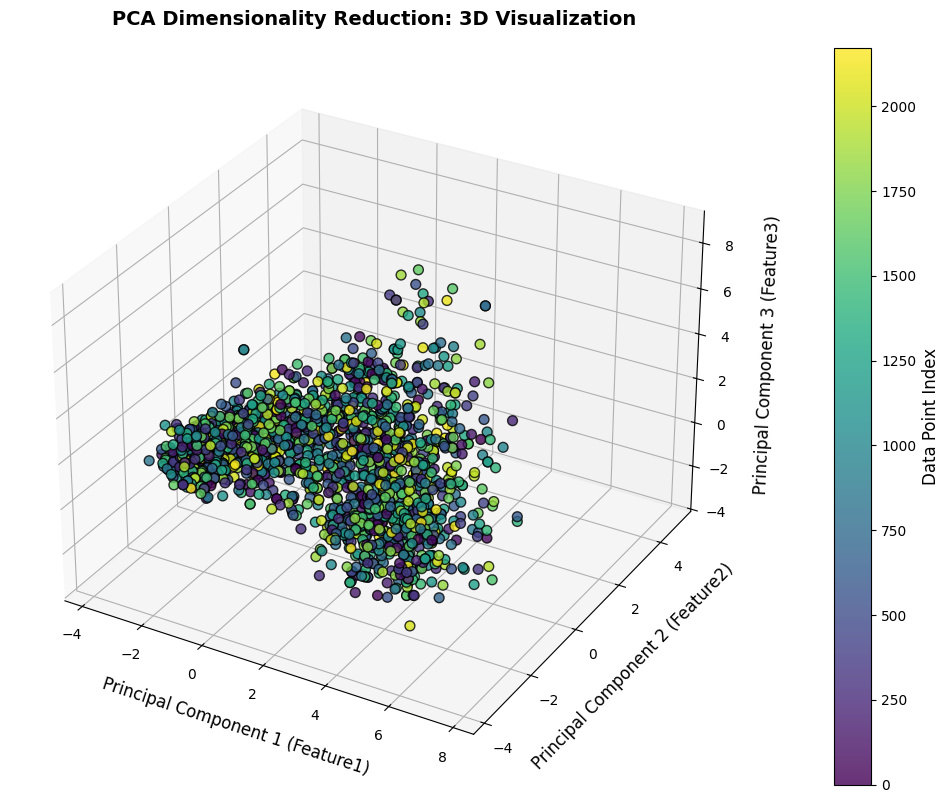

In [28]:
# Graph of PCA
from mpl_toolkits.mplot3d import Axes3D

x = pca_data["Feature1"]
y = pca_data["Feature2"]
z = pca_data["Feature3"]

print(f"The dataset after dimensionality reduction :")

# Add a color scale for clarity (optional: you can categorize points if needed)
colors = sns.color_palette("viridis", n_colors=len(pca_data))

# Start the plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with enhancements
scatter = ax.scatter(
    x, y, z,
    c=range(len(pca_data)),  # Add a color scale
    cmap='viridis',  
    s=50,  
    edgecolor='k',  
    alpha=0.8  
)

# Add a color bar to indicate point order
cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Data Point Index', fontsize=12)

# Set axis labels
ax.set_xlabel('Principal Component 1 (Feature1)', fontsize=12, labelpad=10)
ax.set_ylabel('Principal Component 2 (Feature2)', fontsize=12, labelpad=10)
ax.set_zlabel('Principal Component 3 (Feature3)', fontsize=12, labelpad=10)

# Add a title
ax.set_title('PCA Dimensionality Reduction: 3D Visualization', fontsize=14, fontweight='bold', pad=20)

# Adjust layout for better readability
plt.tight_layout()

# Show the plot
plt.show()

# Segmentation
Determining the optimam number of clusters using Elbow method 

Determining the optimam number of clusters using Elbow method :


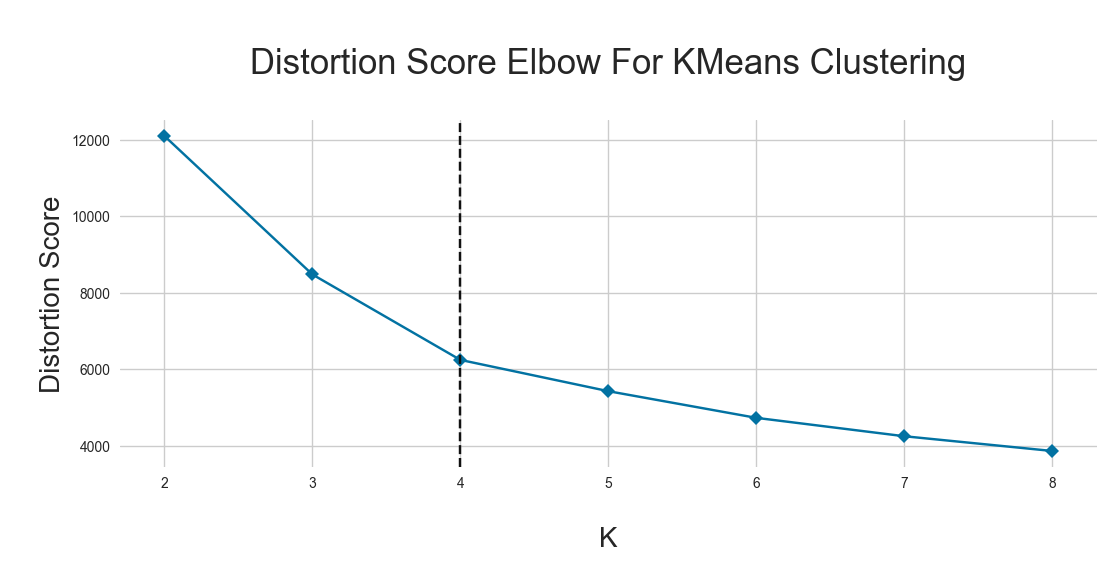

In [29]:
# Segmentation
# importing KElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer

print("Determining the optimam number of clusters using Elbow method :")
_, axes = plt.subplots(figsize=(20,8))

elbow = KElbowVisualizer(KMeans(), k=8, timings=False, locate_elbow=True, size=(1260,450))
elbow.fit(pca_data)

axes.set_title("\nDistortion Score Elbow For KMeans Clustering\n",fontsize=25)
axes.set_xlabel("\nK",fontsize=20)
axes.set_ylabel("\nDistortion Score",fontsize=20)


sns.despine(left=True, bottom=True) 
plt.show()

#### From Dstortion Score Elbow for KMeans clustering graph that **K=4 is the optimal number of clusters**, So we will perform KMeans using K=4

In [30]:
# Perform K-means clustering Using K = 4
kmeans = KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit(scaled_df)

# Create a new DataFrame
clustered_df = pd.DataFrame(scaled_df, columns=["Feature1", "Feature2", "Feature3"])  
clustered_df['Cluster'] = clusters.labels_

# Display the clustered data
clustered_df.head(10)

,Feature1,Feature2,Feature3,Cluster
0,3.790229,0.013449,-0.259857,1
1,-2.416487,0.166468,-0.228338,3
2,1.684246,0.045719,-1.062190,1
3,-2.684128,-1.419234,0.055320,3
4,-0.453338,-0.046838,-0.641903,0
5,0.719230,1.287921,-0.466335,0
6,0.559890,1.318391,-0.846939,0
7,-2.452901,-0.923765,0.255356,3
8,-2.730093,-1.377371,1.575203,3
9,2.920895,-1.553325,-2.519987,1


#### Adding the 'Cluster' Coloumn to the orignal dataframe 'df_org'.

In [31]:
#Adding the Clusters Coloumn to the orignal dataframe 'df_org'.
df_org["Cluster"]= clusters.labels_
df_org.head(5)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Family_Size,Education_Bachelor,Education_Basic,Education_Master,Education_PhD,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow,Cluster
0,5524,1957,58138.0,0,0,58.0,635,88,546,172,...,1,True,False,False,False,False,False,True,False,1
1,2174,1954,46344.0,1,1,38.0,11,1,6,2,...,3,True,False,False,False,False,False,True,False,3
2,4141,1965,71613.0,0,0,26.0,426,49,127,111,...,2,True,False,False,False,False,True,False,False,1
3,6182,1984,26646.0,1,0,26.0,11,4,20,10,...,3,True,False,False,False,False,True,False,False,3
4,5324,1981,58293.0,1,0,94.0,173,43,118,46,...,3,False,False,False,True,False,True,False,False,0


#### Visualizing in 3D the clusters

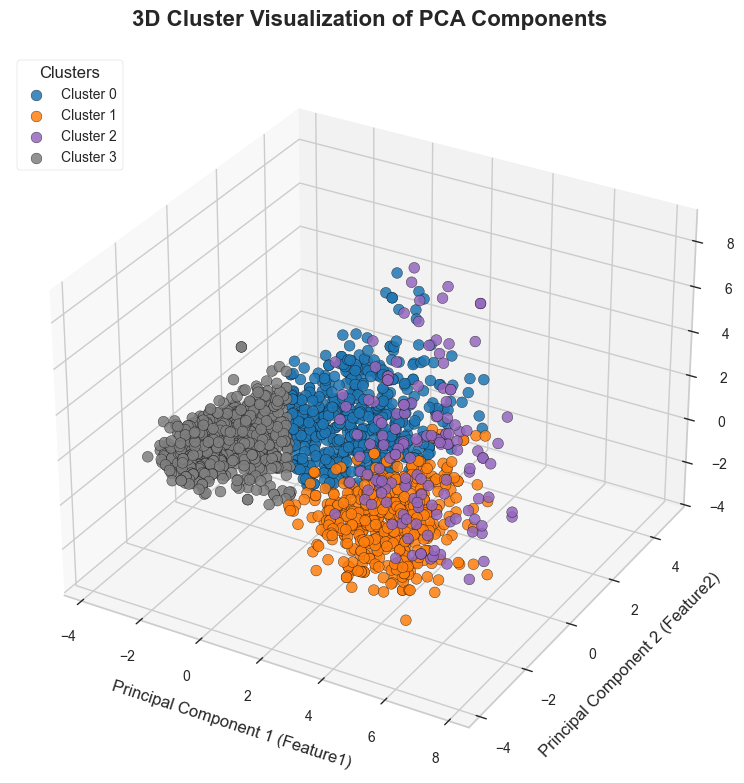

In [32]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns

# Extract X, Y, Z, and Cluster labels
x = clustered_df["Feature1"]
y = clustered_df["Feature2"]
z = clustered_df["Feature3"]
clusters = clustered_df["Cluster"]

# Define a red-green colorblind-friendly palette
palette = ['#1f77b4', '#ff7f0e', '#9467bd', '#7f7f7f']  # Blue, Orange, Purple, Gray

# Create the 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Loop through each cluster and plot points with the defined color palette
for i in range(clusters.nunique()):  # Dynamically adjust for the number of clusters
    ax.scatter(
        x[clusters == i], 
        y[clusters == i], 
        z[clusters == i], 
        color=palette[i], 
        label=f'Cluster {i}', 
        s=60,  
        edgecolor='k',  
        alpha=0.85  
    )

# Set axis labels with business-like design
ax.set_xlabel('Principal Component 1 (Feature1)', fontsize=12, labelpad=12)
ax.set_ylabel('Principal Component 2 (Feature2)', fontsize=12, labelpad=12)
ax.set_zlabel('Principal Component 3 (Feature3)', fontsize=12, labelpad=12)

# Add a descriptive title
ax.set_title('3D Cluster Visualization of PCA Components', fontsize=16, fontweight='bold', pad=20)

# Add a legend to identify clusters
ax.legend(title='Clusters', fontsize=10, title_fontsize=12, loc='upper left', frameon=True, framealpha=0.9)

# Add gridlines for perspective
ax.grid(True, linestyle='--', alpha=0.6)

# Adjust layout for a clean look
plt.tight_layout()

# Show the plot
plt.show()


#### Showing the DOMINANT VARIABLE in each Feature

In [33]:
#
pca_components = pd.DataFrame(pca.components_, columns=df_scaled.columns, index=["Feature1", "Feature2", "Feature3"])
print("Loadings of the original variables in the principal components:")
print(pca_components)

Loadings of the original variables in the principal components:
          Year_Birth    Income   Kidhome  Teenhome   Recency  MntWines  \
Feature1   -0.058727  0.337860 -0.250859 -0.054075  0.001466  0.299387   
Feature2   -0.326253  0.079621 -0.077075  0.521456  0.031578  0.165811   
Feature3    0.058845 -0.020823  0.091458 -0.039271 -0.106738  0.188687   

          MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  ...  \
Feature1   0.258012         0.313192         0.267782          0.261959  ...   
Feature2  -0.103152        -0.134807        -0.113024         -0.093285  ...   
Feature3  -0.197318        -0.047671        -0.195627         -0.165180  ...   

          NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
Feature1             0.323050           0.278509          -0.244522   
Feature2             0.015666           0.203771           0.192022   
Feature3            -0.011036          -0.101162           0.208771   

          AcceptedCmp3  AcceptedC

In [34]:
# Identify dominant variables by component
dominant_features = pca_components.apply(lambda x: x.abs().nlargest(3).index, axis=1)
print("Most influential variables by component:")
print(dominant_features)

Most influential variables by component:
Feature1    Index(['Income', 'NumCatalogPurchases', 'MntMe...
Feature2    Index(['Teenhome', 'NumDealsPurchases', 'NumWe...
Feature3    Index(['Response', 'AcceptedCmp4', 'AcceptedCm...
dtype: object


**Observation for PCA, clustering/segmentation**: 

After applying PCA, the data can be visualized in a 3D space, but the visualization remains unclear. Without clustering, the data points appear scattered and disorganized, with colors randomly distributed, making it difficult to discern meaningful patterns. However, after applying clustering with Kmeans clustering method, it is determined that 4 is the ideal number of clusters (k).

With the clusters identified, the visualization in 3D becomes much clearer, as the data points are now grouped into distinct, well-separated clusters with consistent colors representing each group. This segmentation provides a more structured view of the data, enabling easier interpretation of group patterns.

Further analysis is conducted by examining the dominant features within each cluster. By analyzing the feature contributions to each cluster, we gain insights into the key characteristics that define each group. 
1. Feature 1's top 3 influential variables are 'Income', 'NumCatalogPurchases', and 'MntMeatProducts'
2. Feature 2's top 3 influential variables are 'Teenhome', 'NumDealsPurchases', and 'NumWebPurchases'
3. Feature 3's top 3 influential variables are 'AcceptedCmp4', 'Response', 'AcceptedCmp2'

 This approach allows for targeted strategies to be developed, such as tailoring marketing campaigns, optimizing resource allocation, or improving product offerings, based on the distinct attributes of each cluster.

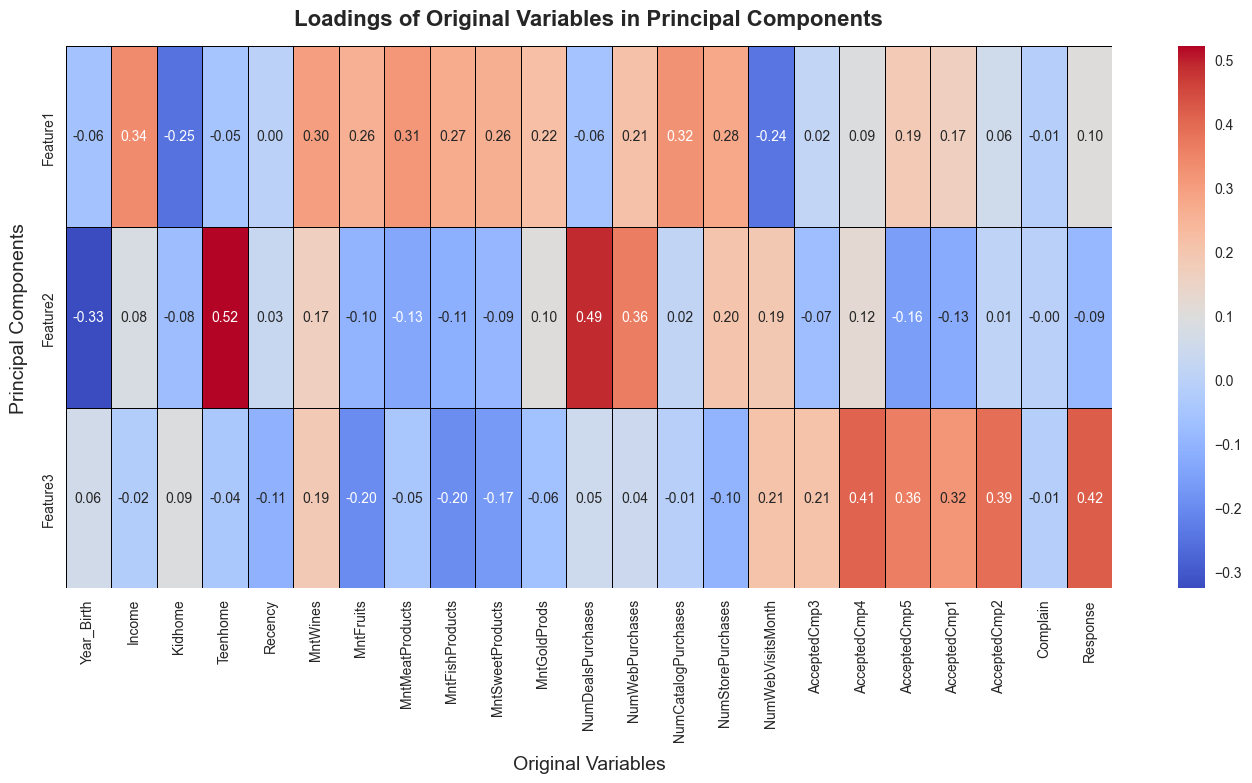

In [35]:
# Generate the heatmap for PCA component loadings
plt.figure(figsize=(14, 8))  # Increase figure size for better readability

# Customize the heatmap
sns.heatmap(
    pca_components,
    annot=True,  
    fmt=".2f",  
    cmap="coolwarm",  
    cbar=True,  
    linewidths=0.5,  
    linecolor='black',  
    annot_kws={"fontsize": 10},  
)

# Add a descriptive title
plt.title("Loadings of Original Variables in Principal Components", fontsize=16, fontweight='bold', pad=15)

# Add axis labels
plt.xlabel("Original Variables", fontsize=14, labelpad=10)
plt.ylabel("Principal Components", fontsize=14, labelpad=10)

# Improve layout for a clean presentation
plt.tight_layout()

# Display the heatmap
plt.show()


The above heatmap shows a more detailed, easy-to-read output of how all the original features contribute to the patterns defined by PCA. Each principal component represents a new, simplified dimension of the data with the heatmap helping the reader to see which original features are most important for each component. Warm colors (red) mean the feature has a strong positive influence, whereas the cool colors (blue) mean it has a strong negative influence. 

1. **Feature 1**: has mostly red or strong positive influence from 'Income', all the "Mnt*" products, 'NumWebPurchases', 'NumStorePurchases', and 'NumStorePurchases'. These variables lie approximately at 0.3 importance. On the other hand, two variables have a negative influence on feature 1, namely 'Kidhome' and 'numWebVisitsMonth", which both lie at approximately -0.25 influence. 

2. **Feature 2**: has significant positive influence from the 'Teenhome' variable at 0.54 influence and 'NumDealsPurchases' at 0.46 influence. In addition, 'NumWebPurchases' also has some significant positive influence at 0.35. The 'Year_Birth' variable has the most negative influence at -0.35. In addition, there is a noticeable neutral to slightly negative influence for promotion variables 0.1 to -0.18, which suggests that this Feature 2 is classified by not very receptive towards promotions.

3. **Feature 3**: has significant positive influence from the Promotion related variables. The 'AcceptedCmp1' and the related variables all have positive influence ranging from 0.2 to 0.42. In addition, there is slight positive influence from 'NumWebVisitsMonth' and 'MntWines' at 0.2. Finally, the other products variables have slight negative influence ranging from -0.06 to -0.2.

### **Feature 1 (Principal Component 1): General Spending and Income-Driven Behavior**

**Analysis**  
- **Strong Positive Contributions**:  
  - **Income** and spending on various product categories (`Mnt*` variables).  
  - Purchases across multiple channels (`NumWebPurchases`, `NumStorePurchases`).  
  - Likely captures general spending capacity and behavior.  
- **Higher Values**:  
  - Indicate customers with higher disposable income and more diverse purchasing habits.  
- **Negative Contributions**:  
  - `Kidhome` and `NumWebVisitsMonth` suggest households with more children and frequent website visits are associated with lower general spending.

**Conclusion**  
Feature 1 may represent a **"High-Income and High-Spending Segment"**, contrasting with households that are cost-sensitive or prioritize web-based browsing over purchases.

---

### **Feature 2 (Principal Component 2): Household-Oriented Behavior and Deals Sensitivity**

**Analysis**  
- **Dominated by Positive Influences**:  
  - `Teenhome` (number of teenagers).  
  - `NumDealsPurchases` (sensitivity to discounts).  
  - `NumWebPurchases` (online purchase behavior).  
- **Dominated by Negative Influences**:  
  - `Year_Birth` (likely related to older customers).  
  - Slight resistance to promotions (`AcceptedCmp*`).  

This suggests a focus on **family-oriented customers** who are:  
- More likely to buy discounted products, driven by practical and cost-conscious choices.  
- Possibly younger or middle-aged households, as older customers (negative `Year_Birth`) are less aligned with this feature.

**Conclusion**  
Feature 2 may represent a **"Family-Oriented, Discount-Sensitive Segment"**, prioritizing deals and online purchases with less engagement in marketing campaigns.

---

### **Feature 3 (Principal Component 3): Promotion Responsiveness**

**Analysis**  
- **Strong Positive Contributions**:  
  - Promotion-related variables (`AcceptedCmp1`, ..., `AcceptedCmp5`, and `Response`).  
  - Highlights customers actively responding to marketing campaigns.  
- **Slight Positive Contributions**:  
  - `MntWines` and `NumWebVisitsMonth` suggest minor alignment with premium/niche products and browsing behavior.  
- **Negative Contributions**:  
  - Other product categories (`Mnt*`) indicate less general spending outside promotional offers.

**Conclusion**  
Feature 3 likely identifies a **"Promotion-Engaged Segment"**, comprising customers highly receptive to campaigns and prioritizing discounts/offers over organic spending.

---

### **General Observations and Recommendations**

#### **Segment-Specific Strategies**
1. **Feature 1 (High-Income, High-Spending Segment)**  
   - Target with **premium products** and **personalized offers**.  
   - Emphasize convenience and exclusivity (e.g., personalized store experiences or loyalty rewards).  

2. **Feature 2 (Family-Oriented, Discount-Sensitive Segment)**  
   - Engage with **family-value bundles**, **discounts**, and targeted online promotions.  
   - Highlight practical, budget-friendly options.  

3. **Feature 3 (Promotion-Engaged Segment)**  
   - Focus marketing campaigns and seasonal promotions on this segment.  
   - Use responsiveness to test new product launches or experimental campaigns.  

#### **Cross-Segment Insights**
- **Feature 2 (Resistant to Promotions)**: Showcase long-term value rather than immediate discounts.  
- **Feature 3 (Promotion-Engaged Customers)**: Develop retention strategies to drive spending beyond discounts.  

#### **Business Implications**
- **Tailored Marketing**: Allocate resources effectively based on segment insights.  
  - Invest in online shopping infrastructure for Feature 2.  
  - Develop frequent campaigns to retain Feature 3 customers.  
  - Enhance in-store experiences for Feature 1 customers.

### Clusters Analysis

In [36]:
# Display the number of data points in each cluster
cluster_counts = clustered_df['Cluster'].value_counts()
print("Number of data points in each cluster:")
print(cluster_counts)
print("\n")

# Calculate mean for each cluster
print("Mean for each feature for each cluster:")
cluster_summary = clustered_df.groupby('Cluster').mean()  
print(cluster_summary)
print("\n")

# Calculate standard deviation for each feature in each cluster
print("Standard deviation of features for each cluster:")
cluster_std = clustered_df.groupby('Cluster').std()
print(cluster_std)
print("\n")

Number of data points in each cluster:
Cluster
3    964
0    587
1    476
2    145
Name: count, dtype: int64


Mean for each feature for each cluster:
         Feature1  Feature2  Feature3
Cluster                              
0        0.258381  1.739170  0.028694
1        3.078534 -0.552373 -1.165653
2        4.609315 -1.152506  3.149130
3       -2.370749 -0.612915  0.084423


Standard deviation of features for each cluster:
         Feature1  Feature2  Feature3
Cluster                              
0        1.137677  0.978229  1.107059
1        1.089554  1.077519  0.877194
2        1.487697  1.271958  2.030838
3        0.647914  0.902126  0.639282




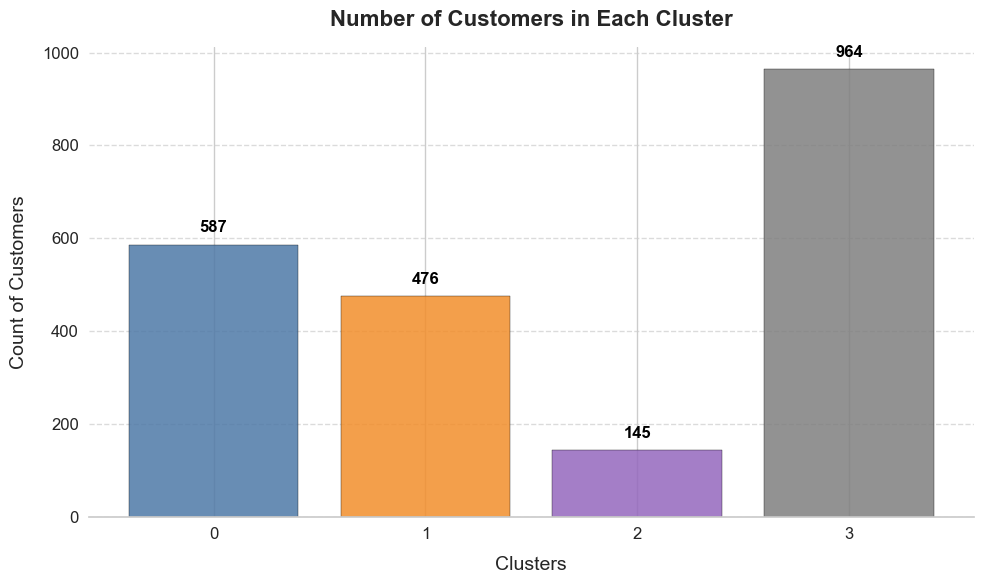

In [37]:
# Display the number of customers in each cluster
cluster_counts = clustered_df["Cluster"].value_counts().sort_index()
cluster_labels = cluster_counts.index  
cluster_values = cluster_counts.values  

# Define a red-green colorblind-friendly palette
colors = ['#4E79A7', '#F28E2B', '#9467BD', '#7F7F7F']  #

# Create the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(cluster_labels, cluster_values, color=colors, edgecolor='black', alpha=0.85)

# Add chart title and axis labels
plt.title("Number of Customers in Each Cluster", fontsize=16, fontweight='bold', pad=15)
plt.xlabel("Clusters", fontsize=14, labelpad=10)
plt.ylabel("Count of Customers", fontsize=14, labelpad=10)

# Annotate the bars with data values
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height + 20,  
        f'{int(height)}',                               
        ha='center', va='bottom', fontsize=12, color='black', fontweight='bold'
    )

# Customize gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(cluster_labels, fontsize=12)  
plt.yticks(fontsize=12)                  

# Remove unnecessary borders for a cleaner look
sns.despine(left=True)

# Adjust layout for better spacing
plt.tight_layout()

# Show the chart
plt.show()


## Cluster Analysis Conclusions

### **1. Cluster Sizes**
- **Observation:**
  The number of data points in each cluster varies significantly:
  - Cluster 0 has the largest size with **999 data points**.
  - Cluster 1 is the smallest with **142 data points**.
  - Clusters 2 and 3 have **479** and **581** data points, respectively.

- **Conclusion:**
  - **Cluster 0:** Likely represents a broad group of customers with common or average characteristics.
  - **Cluster 1:** Represents a niche segment, possibly an outlier group or a specialized demographic.
  - Cluster sizes suggest different levels of customer importance or distinctiveness.

---

### **2. Mean Feature Values**
#### **Cluster 0** (average features)
- Low mean for `Feature1` (-2.33) and `Feature2` (-0.58).  
- Slightly positive mean for `Feature3` (0.05).  
- **Interpretation:**  
  Likely represents customers with low spending/income levels (`Feature1`), moderate sensitivity to household behaviors (`Feature2`), and minimal responsiveness to promotions (`Feature3`).

#### **Cluster 1** (high spenders, promotion sensitive)
- High means across all features, especially `Feature1` (4.66) and `Feature3` (3.12).  
- **Interpretation:**  
  Represents high-spending, promotion-sensitive customers with distinct purchasing behavior. These customers may be the **most valuable** but also the smallest segment.

#### **Cluster 2** (moderate spenders, low promotion sensitive, low family-oriented)
- Moderate positive mean for `Feature1` (3.08).  
- Slightly negative means for `Feature2` (-0.48) and `Feature3` (-1.18).  
- **Interpretation:**  
  Represents customers with moderate spending habits but low promotional responsiveness and family-oriented behavior.

#### **Cluster 3** (balanced spenders, high family-oriented)
- Moderate means for `Feature1` (0.33), and high mean for `Feature2` (1.72).  
- Positive mean for `Feature3` (0.13).  
- **Interpretation:**  
  Represents a balanced group, possibly **family-oriented customers** who also respond to some promotional efforts.

---

### **3. Standard Deviation (Variability)**
#### **Cluster 0** (Most consistent spending patterns)
- Lowest variability across features, especially `Feature1` (0.67).  
- **Interpretation:**  
  Indicates a homogeneous group with consistent behavior patterns.

#### **Cluster 1** (High varaiability in promotion response = potential for marketing)
- Highest variability across features, particularly `Feature3` (2.08).  
- **Interpretation:**  
  This group is heterogeneous, with diverse spending and promotion response patterns. This could reflect a mix of high-value customers with varying preferences.

#### **Cluster 2** (Consistent spending patterns, but slightly less variability in promotion engagemnet)
- Moderate variability, especially in `Feature1` (1.08).  
- **Interpretation:**  
  Reflects consistent spending behavior but moderate differences in family-related and promotion engagement.

#### **Cluster 3** (Bit more diverse in spending patterns)
- Similar variability across features, with slightly higher variation in `Feature1` (1.11).  
- **Interpretation:**  
  Indicates a relatively diverse group, particularly in spending habits.

---

### **Key Business Implications**
1. **Cluster 0:**  
   Represents a large, consistent group. Focus marketing efforts on broad, cost-effective strategies like **basic loyalty programs or maintaining engagement**.

2. **Cluster 1:**  
   Small, high-value, but diverse customers. Consider **personalized, premium offers and exclusive promotions** to maximize returns.

3. **Cluster 2:**  
   Moderate spending group with low promotional responsiveness. Highlight **long-term value and practical deals** to engage them effectively.

4. **Cluster 3:**  
   Family-oriented customers with balanced traits. Leverage **family-value bundles or targeted online campaigns**.

#### Clusters analysis based on Education & Marital Status

In [38]:
# for Under Standing the Clusters and who is in each cluster

# Define the categorical columns explicitly
categorical_columns = [
       'Education_Bachelor',
       'Education_Basic', 'Education_Master', 'Education_PhD',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Widow'
]

# Remove duplicates from df_org columns (if any)
df_org = df_org.loc[:, ~df_org.columns.duplicated()]

# Ensure the specified categorical columns exist in the DataFrame
valid_categorical_columns = [col for col in categorical_columns if col in df_org.columns]

# Group data by clusters
cluster_groups = df_org.groupby('Cluster')

# Profile categorical data for each cluster
categorical_profiles = {}
for cluster, group in cluster_groups:
    cluster_profile = {}
    for col in valid_categorical_columns:
        # Ensure the column is in boolean format (True/False)
        if group[col].dtype == 'bool':
            # Calculate the percentage distribution for True and False values in the cluster
            value_counts = group[col].value_counts(normalize=True) * 100  
            cluster_profile[col] = value_counts
    categorical_profiles[cluster] = cluster_profile

# Convert profiles to DataFrames for readability
cluster_summaries = {}
for cluster, profile in categorical_profiles.items():
    summary = pd.DataFrame(profile).fillna(0)  # Replace NaNs with 0 for missing categories
    cluster_summaries[cluster] = summary

# Print profiles for each cluster
for cluster, summary in cluster_summaries.items():
    print(f"Cluster {cluster} Profile:")
    print(summary.T)  
    print("-" * 50)

Cluster 0 Profile:
                             False      True 
Education_Bachelor       52.129472  47.870528
Education_Basic          99.829642   0.170358
Education_Master         74.787053  25.212947
Education_PhD            73.253833  26.746167
Marital_Status_Divorced  87.393526  12.606474
Marital_Status_Married   32.538330  67.461670
Marital_Status_Single    83.986371  16.013629
Marital_Status_Widow     96.081772   3.918228
--------------------------------------------------
Cluster 1 Profile:
                             False      True 
Education_Bachelor       42.436975  57.563025
Education_Basic          99.789916   0.210084
Education_Master         77.521008  22.478992
Education_PhD            80.252101  19.747899
Marital_Status_Divorced  90.126050   9.873950
Marital_Status_Married   36.974790  63.025210
Marital_Status_Single    77.100840  22.899160
Marital_Status_Widow     95.798319   4.201681
--------------------------------------------------
Cluster 2 Profile:
             

### Interpretation of the above stats on clusters (in order to understand clusters more)

**Cluster 0: Married with higher education levels (Bachelor's degrees)**
*   Dominated by married individuals with a bachelor's degree.
* **Marketing strategies** should primarily target married individuals with bachelor's degrees as they represent the majority.

**Cluster 1: Married &  Singles with higher education levels (Bachelor's and Master's degrees)**
* A balanced distribution among married and single individuals with significant representation in master's and PhD education levels
* **Marketing strategies** Emphasizing premium or educational products in the marketing campain.

**Cluster 2: Married individuals with higher education (Bachelor's and Master's degrees)**
* Higher proportion of married individuals with bachelor's and master's degrees.


**Cluster 3: Single individuals with a higher concentration of Bachelor's degree holders, ollowed by PhD holders.**
* Dominated by single individuals with bachelor's degrees, followed by PhD holders.
* **Marketing strategies** Emphasizing premium or educational products in the marketing campain.

#### Visualizing Clusters Vs Education & Marital Status

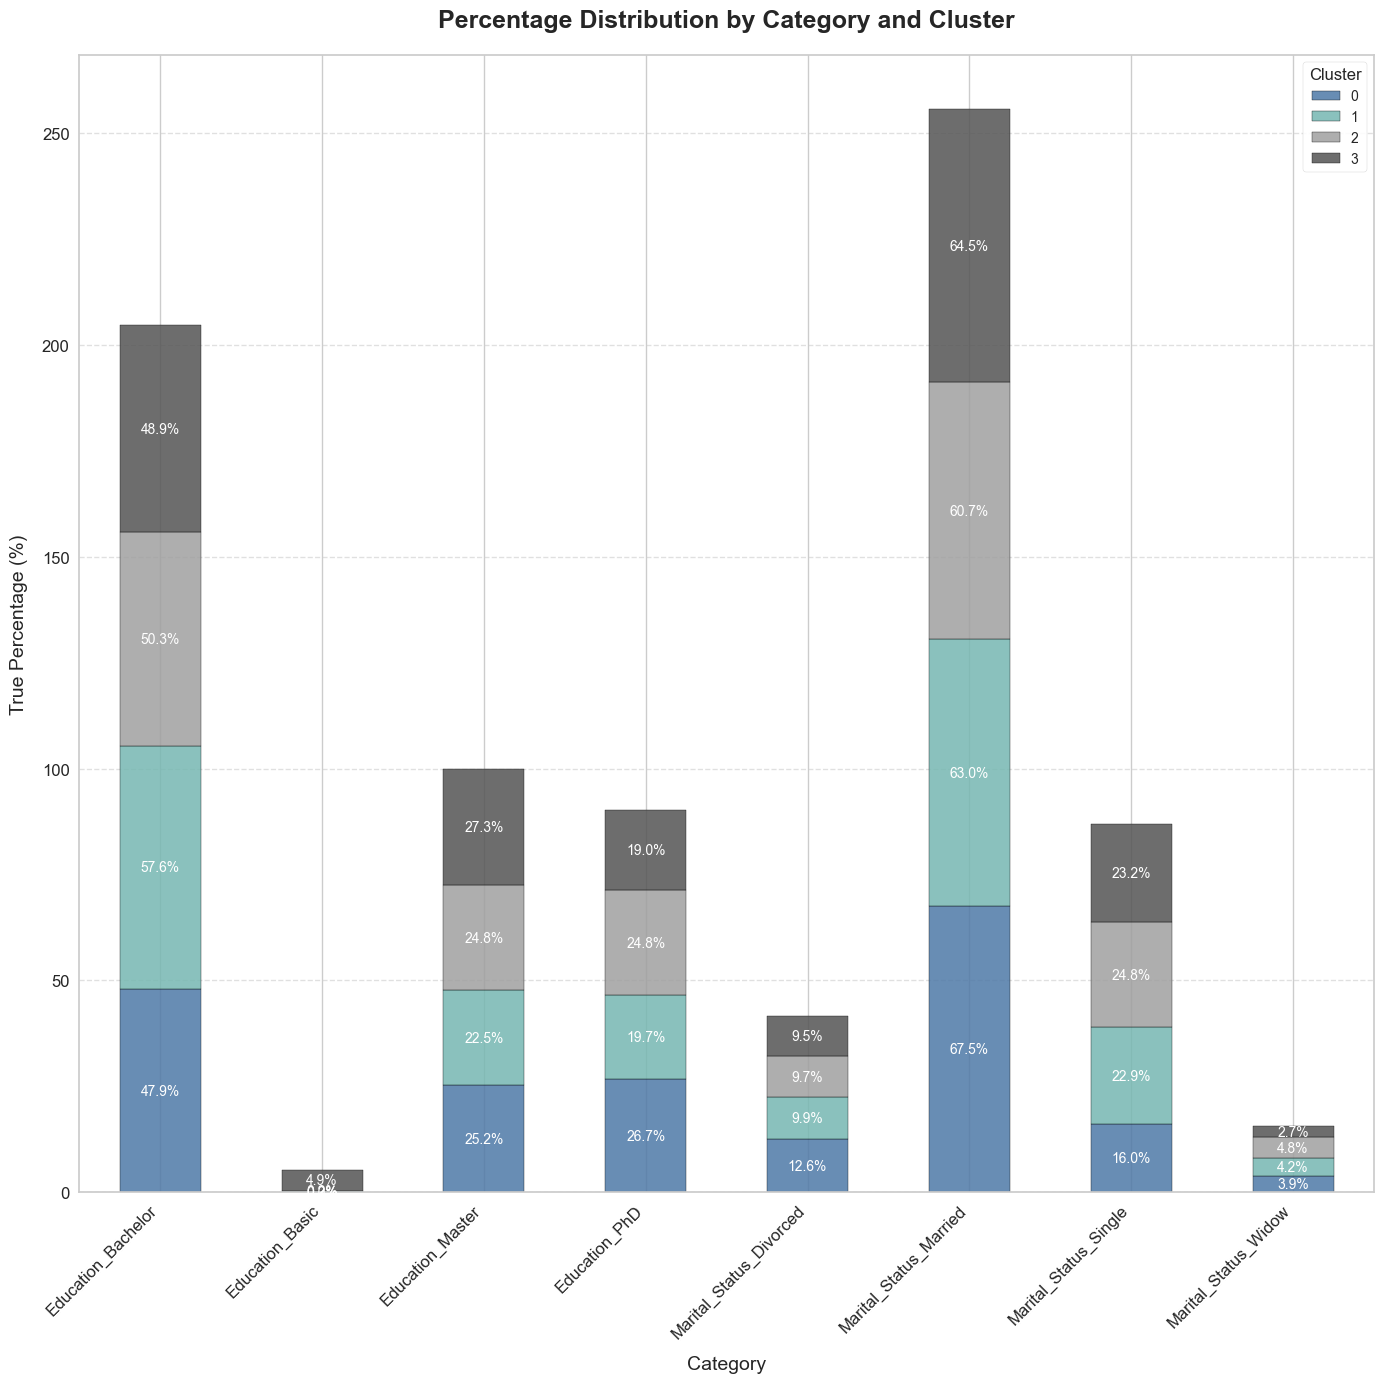

In [46]:
# Visualizing Clusters Vs Education & Marital Status

import pandas as pd
import matplotlib.pyplot as plt

# Group data by clusters
cluster_groups = df_org.groupby('Cluster')

# Create an empty list to collect the data for plotting
plot_data = []

# Profile categorical data for each cluster and collect the True percentage for each category
for cluster, group in cluster_groups:
    for col in valid_categorical_columns:
        if group[col].dtype == 'bool':  # Ensure the column is boolean
            # Calculate the percentage of True values in each cluster
            true_percentage = group[col].mean() * 100  # Mean of booleans gives the percentage of True values
            plot_data.append({'Cluster': cluster, 'Category': col, 'True Percentage': true_percentage})

# Convert the list to a DataFrame
plot_df = pd.DataFrame(plot_data)

# Pivot the data for stacked bar chart
plot_pivot = plot_df.pivot(index='Category', columns='Cluster', values='True Percentage')

# Define a business-style color palette
business_palette = ['#4E79A7', '#76B7B2', '#A0A0A0', '#545454']  

# Plot the stacked bar chart
plot_pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 14),
    color=business_palette,
    edgecolor='black',
    alpha=0.85
)

# Customize the chart
plt.title('Percentage Distribution by Category and Cluster', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Category', fontsize=14, labelpad=10)
plt.ylabel('True Percentage (%)', fontsize=14, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate bars with percentages
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10, color='white')

# Add legend
plt.legend(title='Cluster', fontsize=10, title_fontsize=12, loc='upper right', frameon=True, framealpha=0.9)

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()



#### Showing Distribution of Feature1 & Feature2 & Feature3 on each cluster of customers

C:\Users\Administrator\AppData\Local\Temp\1\ipykernel_4676\302641867.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


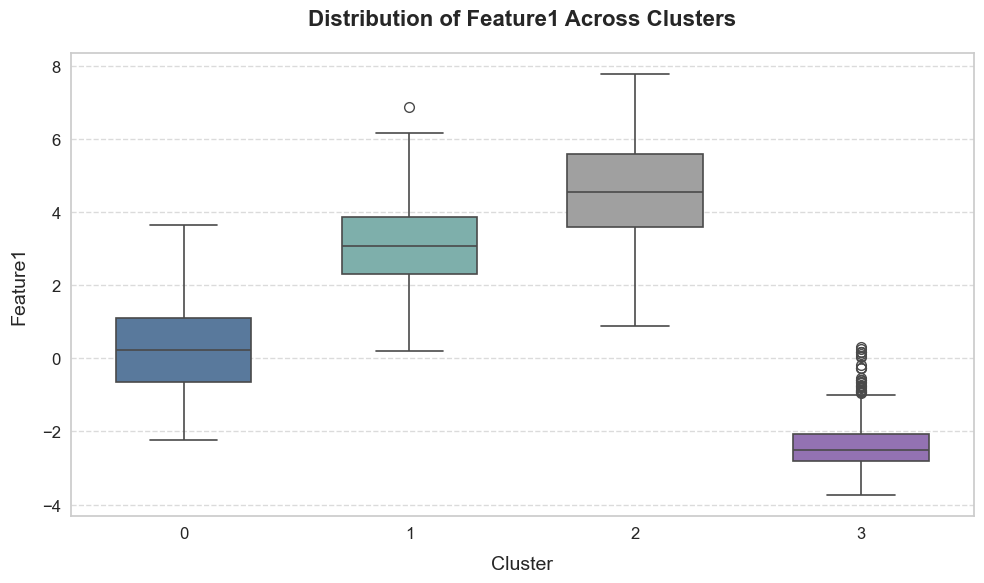

C:\Users\Administrator\AppData\Local\Temp\1\ipykernel_4676\302641867.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


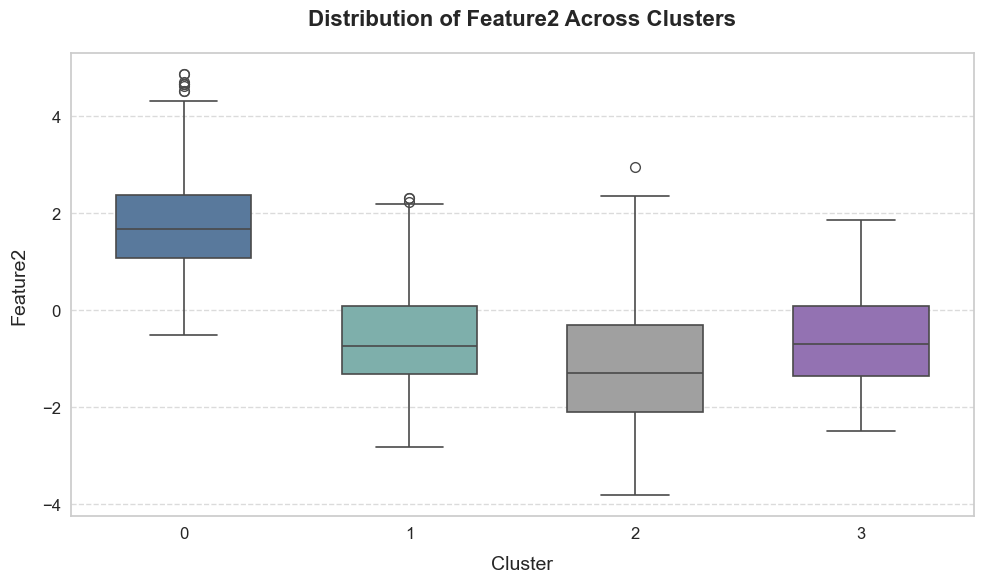

C:\Users\Administrator\AppData\Local\Temp\1\ipykernel_4676\302641867.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


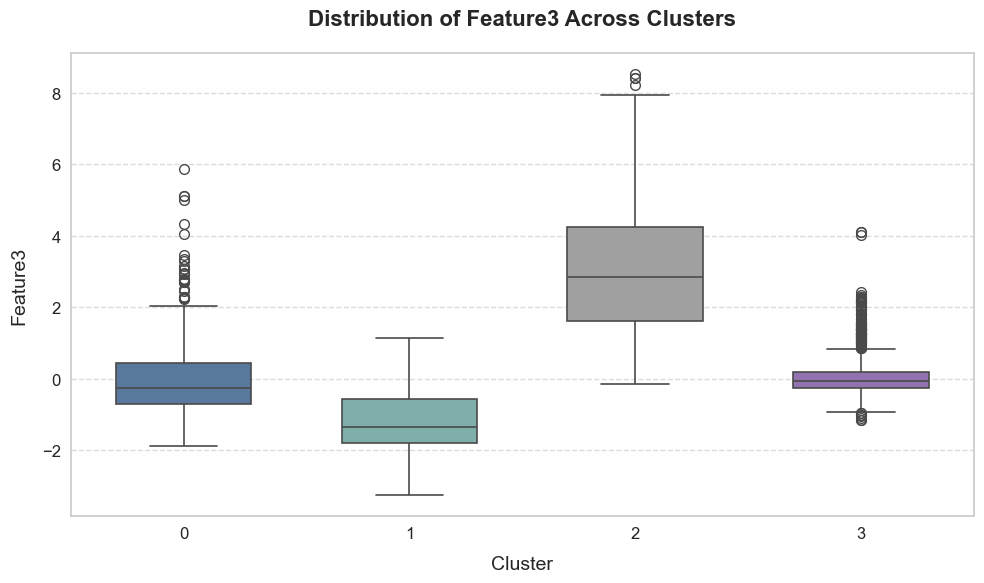

In [40]:
# Showing Distribution of Feature1 & Feature2 & Feature3 on each cluster of customers

# Improved visualization for distribution of Feature1, Feature2, and Feature3 across clusters
features = ["Feature1", "Feature2", "Feature3"] 
colors = ['#4E79A7', '#76B7B2', '#A0A0A0', '#9467BD']   

for feature in features:
    plt.figure(figsize=(10, 6))  # Set the figure size
    
    # Create a boxplot for the feature grouped by clusters
    sns.boxplot(
        x='Cluster', 
        y=feature, 
        data=clustered_df, 
        palette=colors, 
        width=0.6,  
        linewidth=1.2  
    )
    
    # Customize the plot
    plt.title(f'Distribution of {feature} Across Clusters', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Cluster', fontsize=14, labelpad=10)
    plt.ylabel(feature, fontsize=14, labelpad=10)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Add a grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Tighten the layout for a polished appearance
    plt.tight_layout()
    
    # Show the plot
    plt.show()


#### Insights from the above 3 graphs
##### Feature 1 Figure:
* Cluster 1 represents the most positive "Feature1" values and has the widest variability. It could be ideal for premium or high-value offerings.

##### Feature 2 Figure:
* Cluster 3 with high "Feature2" values and variability suggest it could represent a high-performing group or one with significant potential. Tailored strategies focusing on premium offerings or personalized approaches could be effective.
* Clusters 0 and 2 as stable segments: Standardized strategies could work effectively for these groups, with less need for highly specialized approaches.

##### Feature 3 Figure:
* Cluster 1 represents the most positive "Feature3" values and has the widest variability. It could be ideal for premium or high-value offerings.

#### Showing Total Number of Accepted Campains for each cluster

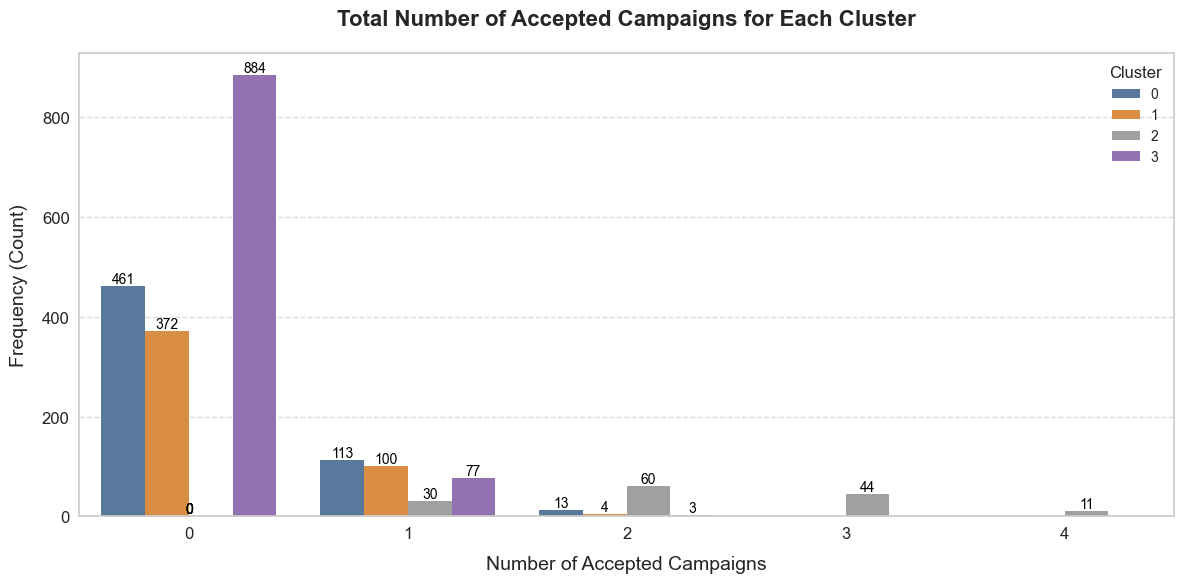

In [41]:
# Optimized Visualization for Total Number of Accepted Campaigns per Cluster
plt.figure(figsize=(12, 6))  # Set figure size

# Create the countplot with Seaborn for cleaner aesthetics
pl = sns.countplot(
    x='No of Accepted Campains', 
    hue='Cluster', 
    data=df_org, 
    palette = ['#4E79A7', '#F28E2B', '#A0A0A0', '#9467BD']  
)

# Set the title and axis labels with consistent styling
pl.set_title("Total Number of Accepted Campaigns for Each Cluster", fontsize=16, fontweight='bold', pad=20)
pl.set_xlabel("Number of Accepted Campaigns", fontsize=14, labelpad=10)
pl.set_ylabel("Frequency (Count)", fontsize=14, labelpad=10)
pl.tick_params(axis='both', labelsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with the count values
for p in pl.patches:
    height = p.get_height()  
    x_position = p.get_x() + p.get_width() / 2  
    # Add the text label
    pl.text(
        x_position, 
        height + 0.1,  
        f'{int(height)}', 
        ha="center", va="bottom", fontsize=10, color='black'
    )

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


#### Insights from the graph
##### **Cluster 0** has the highest number of individuals with "0 Accepted Campaigns," suggesting this group is the least responsive.
##### **Cluster 1** is the most engaged group, with the highest representation in 2, 3, and 4 accepted campaigns.
##### **Clusters 2** have high counts in "0 Accepted Campaigns," indicating disengagement.
##### **Clusters 3** have high counts in "0 Accepted Campaigns," indicating disengagement.
##### **Cluster 3** has the highest number of individuals accepting exactly 1 campaign, indicating a small but significant level of engagement.


#### Plotting Family Sizes in each cluster

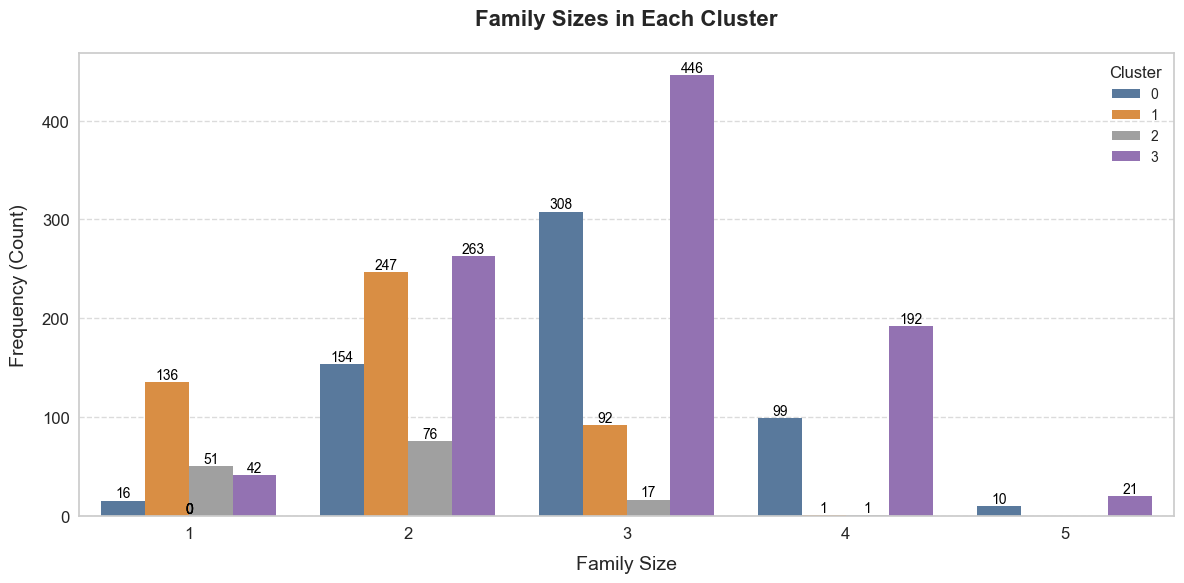

In [42]:
# Optimized Visualization for Family Sizes in Each Cluster
plt.figure(figsize=(12, 6))  # Set a larger figure size for better readability

# Create the countplot with a professional color palette
pl = sns.countplot(
    x='Family_Size', 
    hue='Cluster', 
    data=df_org, 
    palette = ['#4E79A7', '#F28E2B', '#A0A0A0', '#9467BD']
)

# Set the title and axis labels with enhanced styling
pl.set_title("Family Sizes in Each Cluster", fontsize=16, fontweight='bold', pad=20)
pl.set_xlabel("Family Size", fontsize=14, labelpad=10)
pl.set_ylabel("Frequency (Count)", fontsize=14, labelpad=10)
pl.tick_params(axis='both', labelsize=12)

# Add gridlines for easier interpretation
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate the bars with the count values
for p in pl.patches:
    height = p.get_height()  # Get the bar height
    x_position = p.get_x() + p.get_width() / 2  # Calculate the center of the bar
    # Add the annotation with proper styling
    pl.text(
        x_position, 
        height + 0.1,  # Position above the bar
        f'{int(height)}',  # The count value
        ha="center", va="bottom", fontsize=10, color='black'
    )

# Adjust the legend styling for clarity
plt.legend(
    title='Cluster', 
    title_fontsize=12, 
    fontsize=10, 
    loc='upper right', 
    frameon=False
)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


#### Insights from the graph:
* **Cluster 0** leads in meduim family sizes (3 members) and small family size of (1 to 2) members (Small to Meduim Families)
*             Consider offering bundles tailored to 2–3-member families.
* **Cluster 1** most in small family size of (1 to 2) members (Small Families)
*             Target single individuals with individual-focused offerings, such as single-serve products
* **Cluster 2** leads in small family size of (1 to 2) members (Small Families)
*             Target single individuals with individual-focused offerings, such as single-serve products
* **Cluster 3** leads in large family sizes (4–5 members) and meduim family size of 3 members (Meduim to Larg Families)
*             Tailor campaigns for medium and large families, such as family bundles, home appliances, or family-oriented services.

#### Using Seaborn (sns) to generate visualizations for the relationships between a set of personal features ('Income' , 'Family_Size', 'Education', ...etc.) and the amount spent by a customer.

##### 1. using Seaborn (sns) to generate visualizations for the relationships between 'Income' and the amount spent by a customer.

c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
C:\Users\Administrator\AppData\Local\Temp\1\ipykernel_4676\1853539262.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(


<Figure size 1000x600 with 0 Axes>

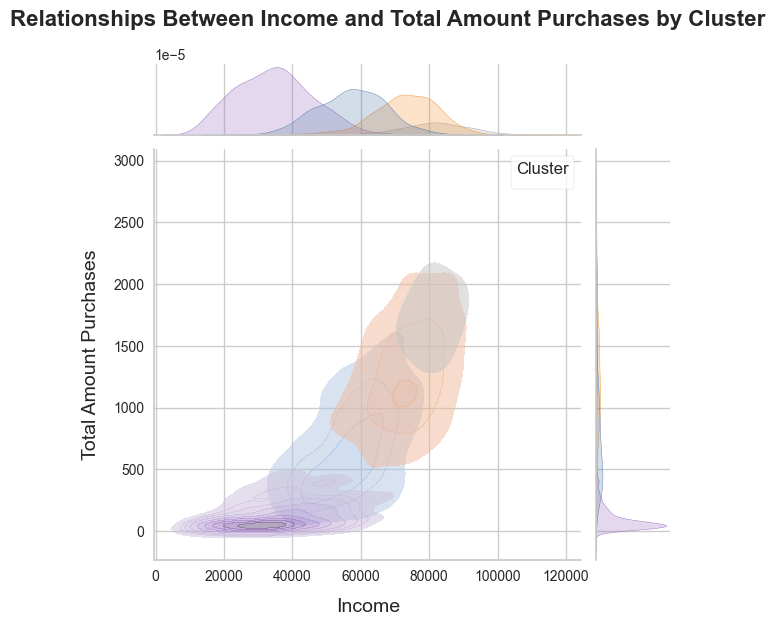

In [43]:
# Optimized KDE Plot for Income vs. Total Amount Purchases
plt.figure(figsize=(10, 6))  # Set figure size for better readability

# Create a KDE plot using Seaborn's jointplot
joint_plot = sns.jointplot(
    x='Income', 
    y='Total Amount Purchases', 
    hue='Cluster', 
    data=df_org, 
    kind="kde", 
    palette = ['#4E79A7', '#F28E2B', '#A0A0A0', '#9467BD'], 
    fill=True,  
    alpha=0.5,  
    linewidth=1  )

# Add titles and labels with enhanced styling
joint_plot.fig.suptitle(
    'Relationships Between Income and Total Amount Purchases by Cluster', 
    fontsize=16, fontweight='bold', y=1.02
)
joint_plot.set_axis_labels(
    'Income', 
    'Total Amount Purchases', 
    fontsize=14, 
    labelpad=10
)

# Adjust title and spacing for better layout
joint_plot.fig.subplots_adjust(top=0.93, hspace=0.2)

# Add a legend with customization
plt.legend(
    title='Cluster', 
    title_fontsize=12, 
    fontsize=10, 
    loc='upper right', 
    frameon=True
)

# Display the plot
plt.show()

#### Insights from the graph
 **Cluster 0 (Red):**
*   Concentrated in the low-income range (up to $40,000).
*   Total purchases are minimal, mostly below 500.
*   Represents a low-income, low-spending group.
**Engage Cluster 0 with budget-friendly strategies**

**Cluster 1 (Blue):**
*   Located in the middle-income range ($50,000–$80,000).
*   Total purchases range between 500 and 1,500, indicating moderate to high spending.
*   Represents a mid-income, high-spending group.

 **Cluster 2 (Green):**
*   Distributed in the upper-middle-income range ($70,000–$100,000).
*   Total purchases range from 500 to 2,000, suggesting higher spending.
*   Represents a mid-income, high-spending group.
**Target Cluster 2 for premium offerings**

**Cluster 3 (Pink):**
*   Located in the low-mid-income range ($50,000–$90,000).
*   Total purchases are distributed between 500 and 1,500, indicating moderate spending.


### **Conclusion**
#### Cluster Profiles and Suggested Marketing Strategies

##### **Cluster 0 - Profile: Traditional Married Budget-Conscious Families
* Marital Status: Predominantly married.
* Education: Bachelor’s or basic education.
* Income: Low-income bracket.
* Spending: Low-spending behavior.

**Suggested Marketing Strategy for Cluster 0:** 
* Product Bundling: Create family-friendly bundles that offer discounts on grocery items, home essentials, or child-centric products. For instance, “Back-to-School Kits” or “Family Movie Night Packages.”
* Community Engagement: Organize family-oriented community events, such as free workshops or kids’ activity days, where your brand can subtly integrate its products.
* Referral Incentives: Offer discounts or cash-back rewards for referring other family members or friends to your brand.
* Digital Accessibility: Introduce user-friendly apps or platforms with budgeting tools, family planners, or discounts tailored to families’ needs.
* Localized Promotions: Work with local stores or community centers to provide hyper-localized offers that appeal to traditional family setups.


##### **Cluster 1 - Profile: Educated Singles & Widowed Professionals
* Marital Status: Diverse mix of singles, married, and widowed individuals.
* Education: Higher education levels (master’s and PhD).
* Income: Moderate-income level.
* Spending: Mid-tier spending group.

**Suggested Marketing Strategy for Cluster 1:** 
* Professional Development: Offer packages focused on certifications, skill upgrades, and networking events. Partner with platforms like LinkedIn or online learning hubs for joint promotions.
* Personalized Experiences: Introduce customizable products or services, such as tailored skincare routines or custom-designed office setups.
* Luxury Sampling: Provide free samples or trials of premium products, enticing them to convert to long-term customers.
* Upsell Wellness Programs: Highlight wellness retreats, mindfulness apps, or self-care subscriptions targeting personal growth.
* Cross-Collaborations: Collaborate with professional organizations or alumni networks for exclusive offers targeting professionals looking to upskill.

##### **Cluster 2 - Profile: Educated Married High Earners
* Marital Status: Predominantly married professionals.
* Education: Bachelor’s and master’s degrees.
* Income: High-income bracket.
* Spending: Consistently high spenders.

**Suggested Marketing Strategy for Cluster 2:** 
* Exclusive Memberships: Offer VIP membership programs with added benefits, such as free delivery, premium packaging, or exclusive discounts on luxury products.
* Family-Centric Luxury: Highlight high-quality, long-lasting family products, such as educational tech devices for children, luxury travel packages, or eco-friendly home appliances.
* Event Sponsorships: Sponsor family-friendly upscale events, such as wine tastings, tech fairs, or educational workshops, to create a high-value association with your brand.
* Premium Subscription Services: Launch subscription boxes featuring curated items like artisanal goods, gourmet snacks, or home décor, delivered monthly.
* Smart Home Integration: Collaborate with smart home brands to introduce exclusive deals on connected devices that align with their modern lifestyle.


##### **Cluster 3 - Profile: Urban Educated Singles
* Marital Status: Mostly single individuals.
* Education: Bachelor’s and PhD holders dominate this cluster.
* Income: Middle-to-upper-middle income.
* Spending: Moderate to high spenders.

**Suggested Marketing Strategy for Cluster 3:** 
* Experience Marketing: Promote experiential products or services, such as VR gaming setups, co-working spaces, or exclusive access to events like concerts or exhibitions.
* Digital Exclusivity: Use digital marketing strategies like flash sales, early-access offers, or influencer-led campaigns to align with their fast-paced, tech-savvy lifestyle.
* Subscription Models: Provide subscriptions for lifestyle services, such as premium gym memberships, food delivery plans, or streaming platforms.
* Sustainability Appeal: Highlight eco-friendly products, such as reusable travel kits or sustainable fashion, to cater to their likely environmental awareness.
Gadget and Tech Enthusiasm: Market premium gadgets (headphones, smart devices) with a focus on sleek design and cutting-edge technology.

##### **Overall
1. Omnichannel Presence: Use digital platforms for Cluster 3 while maintaining traditional marketing approaches for Cluster 0. Personalized campaigns for Clusters 1 and 2 could perform well in hybrid models combining digital and offline channels.
2. Product Differentiation: Offer clearly segmented products to address the unique needs of each cluster, ensuring that overlaps between segments (e.g., Cluster 1 and Cluster 3) are minimal.
3. Loyalty Ecosystem: Develop a unified loyalty program with tiered benefits for each cluster. For example, Cluster 0 can earn points on value purchases, while Cluster 2 gets concierge services.
4. Data-Driven Customization: Use insights from spending behaviors and preferences to drive real-time personalized offers across e-commerce platforms, boosting conversion rates.
5. Collaborative Opportunities: Partner with external organizations such as universities, family brands, or tech companies to create collaborative campaigns that expand the reach across clusters.
